# Исследование объявлений о продаже квартир

### Откройте файл с данными и изучите общую информацию. 

1.1 Вызываем все необходимые библиотеки, которые потребуются для работы, а также загружаем данные из файла:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('/datasets/real_estate_data.csv', sep ='\t')

1.2 Получаем общую информацию о датафрейме:

In [2]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

1.3 Выведем для изучения первые 10 строк датафрейма:

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


1.4 Построим гистограмму для всех столбцов таблицы:

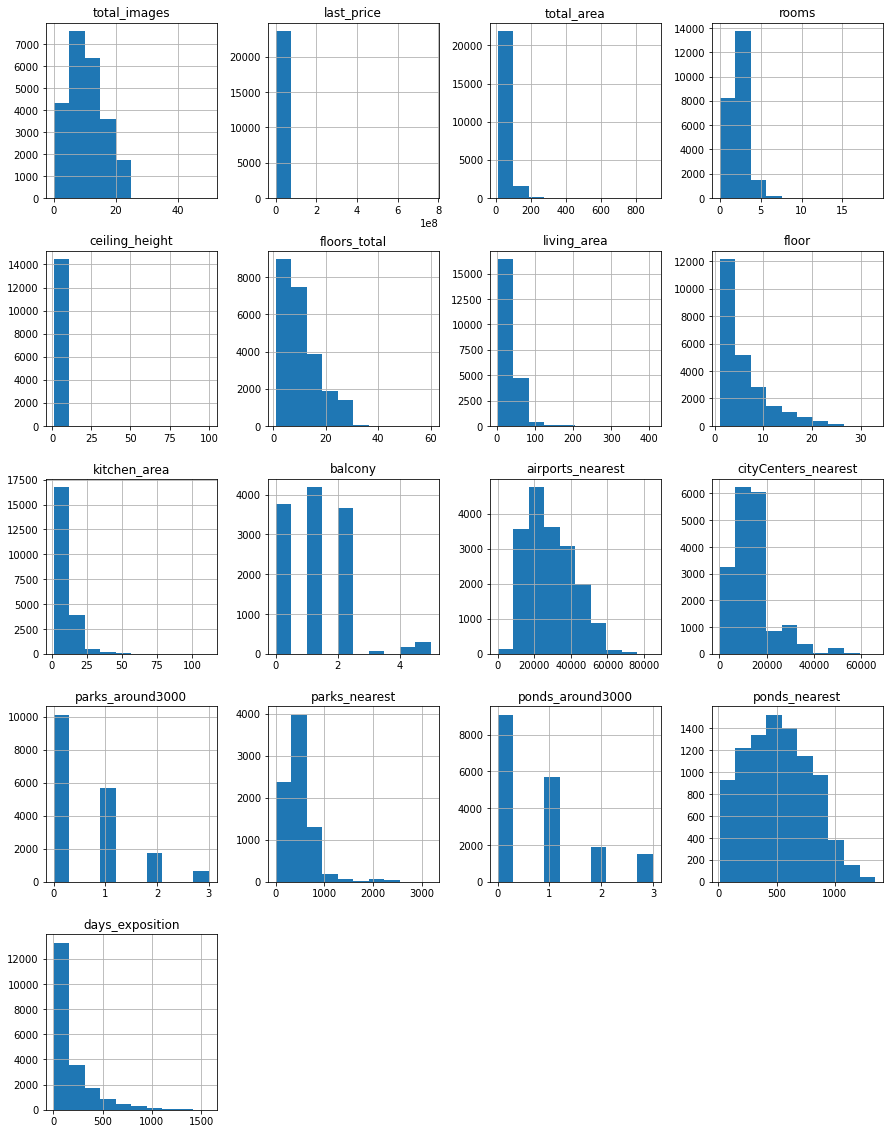

In [4]:
data.hist(figsize=(15,20))
plt.show()

### Предобработка данных

**2.1 Удаление пропусков.**

   Согласно информации, полученной в пункте 1.2, пропуски имеются в следующих столбцах (и сразу определимся, в каких столбцах пропуски наиболее критичны):

* *airports_nearest* - 23,4 % пропусков: заменить можно медианным расстоянием от квартир в населенном пункте до аэропорта;


* *balcony* - 48,6 % пропусков: в большинстве случаев пропуске обусловлены отсутствием балкона в квартире, поэтому будет логично заменить на "0";


* *ceiling_height* - 38,8 % пропусков: здесь пропуски логично заменить медианной высотой потолков среди всех объявлений  (строительство в большей части типовое);


* *cityCenters_nearest* - 23,2 % пропусков: заменить можно медианным расстоянием от квартир в населенном пункте до центра города;


* *days_exposition* - 13,4 % пропусков: пропуски могли быть вызваны как продажей в первый же день после выставления объявления, так и тем, что квартира до сих пор не продана. Однако, замену здесь можно произвести на значения соотвествующие медианному времени продажи жилья в указанном населенном пункте;


* *floors_total* - 0,36 % пропусков: пропусков мало, на общую выборку влияния не окажут (оставим без изменений);


* *is apartment* - 88,3 % пропусков: здесь пропуски могли быть вызваны некорректным указанием информации. Для исправления необходимо этот столбец преобразовать в булев тип, где пропуски будут заменены на "False";


* *kitchen_area* - 9,6 % пропусков: пропуски можно заменить медианными значениями площади кухни в квартирах с одинаковым количеством комнат, исходя из известной общей площади квартир и медианной доли кухни;


* *living_area* - 8,0 % пропусков: пропуски заменить можно аналогичным способом, что и с площадью кухни;


* *locality_name* - 0,21 % пропусков: здесь пропуски можно заменить на "no_info";


* *parks_around3000* - 23,3 % пропусков: пропуски, скорее всего, соответствуют тем местам, где парков поблизости нет. Значит заменим пропущенные значения на "0";


* *parks_nearest* - 65,9 % пропусков: замену можно произвести исходя из медианного расстояния до ближайшего парка в каждом населенном пункте и значения в столбце *parks_around3000*, отличного от нуля;


* *ponds_around3000* - 23,3 % пропусков: пропуски, скорее всего, соответствуют тем местам, где водоемов поблизости нет. Значит заменим пропущенные значения на "0";


* *ponds_nearest* - 61,6 % пропусков: замену можно произвести исходя из медианного расстояния до ближайшего водоёма в каждом населенном пункте и значения в столбце *ponds_around3000*, отличного от нуля.


В таблице также будет необходимо поменять тип данных в тех столбцах, где это важно. На этапе удаления пропусков смену типа произведем только в тех столбцах, где это критично. В остальных случаях смену типов выполним уже после удаления пропусков.


In [5]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,38.800000
floors_total,0.400000
living_area,8.000000
floor,0.000000
is_apartment,88.300000


2.1.1 Начнем заполнять пропуски со столбца *locality_name*:

In [6]:
data['locality_name'] = data['locality_name'].fillna('no_info')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

Как видно выше, пропуски в населённых пунктах устранены. Для дальнейшей работы с датафреймом желательно избавиться от неявных дубликатов в названиях населённых пунктов. 

Выведем общий список названий:

In [7]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [8]:
data['locality_name'].value_counts() # посчитаем общее число уникальных населенных пунктов

Санкт-Петербург            15721
посёлок Мурино               522
посёлок Шушары               440
Всеволожск                   398
Пушкин                       369
                           ...  
деревня Чудской Бор            1
поселок станции Корнево        1
село Никольское                1
поселок Жилгородок             1
деревня Нижние Осельки         1
Name: locality_name, Length: 365, dtype: int64

Получили 365 уникальных названий. 

В первую очередь избавимся от буквы "ё", чтобы не было повторения со словами, где вместо "ё" написана буква "е".

In [9]:
locality_name = data['locality_name'] 
new_locality_name = [_.replace("ё", "е", 1) for _ in locality_name]
data['locality_name'] = new_locality_name 
data['locality_name'].value_counts()

Санкт-Петербург            15721
поселок Мурино               556
поселок Шушары               440
Всеволожск                   398
Пушкин                       369
                           ...  
поселок Жилпоселок             1
деревня Тихковицы              1
поселок Гладкое                1
поселок Цвылево                1
поселок станции Лужайка        1
Name: locality_name, Length: 333, dtype: int64

Также есть неявные дубликаты при использовании типа населенного пункта "городской поселок". Он идентичен наименованию "поселок городского типа". Исправим и этот дубликат:

In [10]:
locality_name_pgt = data['locality_name'] 
new_locality_name_pgt = [_.replace("городской поселок", "поселок городского типа", 1) for _ in locality_name_pgt]
data['locality_name'] = new_locality_name_pgt 
data['locality_name'].value_counts()

Санкт-Петербург       15721
поселок Мурино          556
поселок Шушары          440
Всеволожск              398
Пушкин                  369
                      ...  
деревня Тихковицы         1
деревня Пижма             1
поселок Цвылево           1
деревня Пустынка          1
деревня Снегиревка        1
Name: locality_name, Length: 326, dtype: int64

Выведем еще раз их названия, а затем проверим, что общая таблица не "потеряла" измененные строки:

In [11]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары',
       'поселок городского типа Янино-1', 'поселок Парголово',
       'поселок Мурино', 'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин',
       'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посел

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

Все в порядке, можно двигаться дальше.

2.1.2 Теперь избавимся от пропусков в столбце *balcony*:

In [13]:
data['balcony'].unique() # проверили, что кроме пропущенных значений нет других аномалий

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [14]:
data['balcony'] = data['balcony'].fillna(0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

In [15]:
data['balcony'].unique()

array([0., 2., 1., 5., 4., 3.])

Пропуски в столбцах с информацией о балконах устранены.

2.1.3 Теперь разберемся со столбцом *is_apartment*. Здесь произведем преобразование данных в булев тип, где пропускам будет присвоено значение "False":

In [16]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [17]:
data['is_apartment']=data['is_apartment'].astype('bool')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

С аппартаментами тоже разобрались - теперь данные на месте, и они стали булевыми.

2.1.4 Теперь перейдем к высоте потолков (*ceiling_height*). Для начала посмотрим, какие значения в принципе у нас имеются:

In [18]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Понятно, что высоты потолков в 1 метр и 100 метров - ошибочны. Построим гистограммы для 3 разных интервалов высоты потолков: 

* от 0 до 2 метров;
* от 2 до 6 метров;
* от 6 до 100 метров.

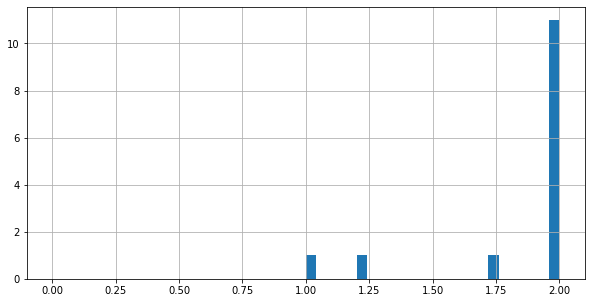

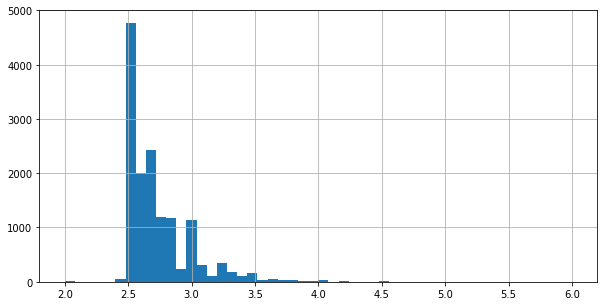

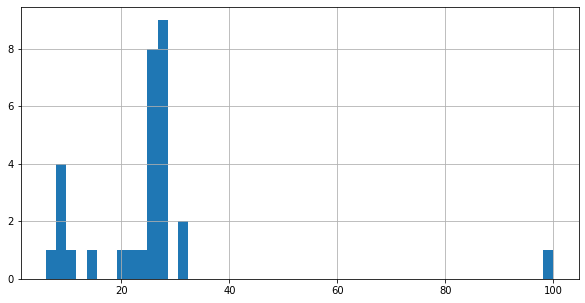

In [19]:
data['ceiling_height'].hist(bins=50, range=(0,2), figsize=(10,5))
plt.show()
data['ceiling_height'].hist(bins=50, range=(2,6), figsize=(10,5))
plt.show()
data['ceiling_height'].hist(bins=50, range=(6,100), figsize=(10,5))
plt.show()

Как видно на рисунках, количество аномальных значений невелико. Основные размеры потолков лежат в диапазоне от 2,4 до 3,5 метров. На третьей диаграмме имеется "всплеск" значений от 18 до примерно 36 метров. Здесь, вероятнее всего, была пропущена запятая, и таким образом высота потолка стала больше в 10 раз. Можем заменить эти значения на более реальные:

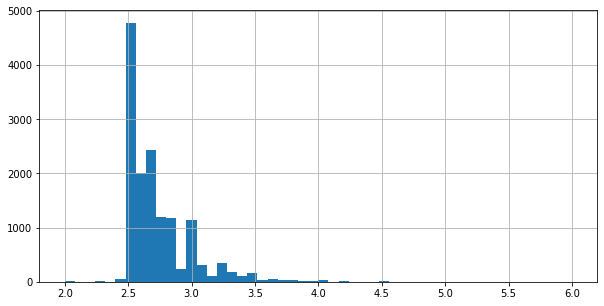

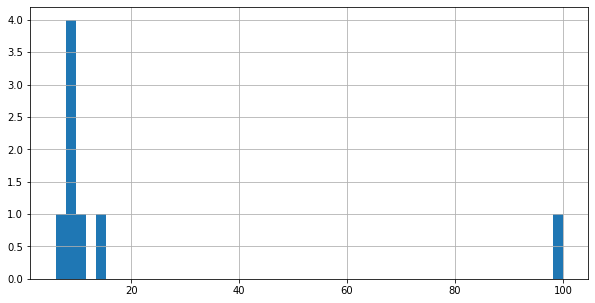

In [20]:
index_ceiling = data.query('ceiling_height > 18 and ceiling_height < 36').index # присваиваем индексы для "ошибочных" высот
data.loc[index_ceiling, 'ceiling_height'] = data.loc[index_ceiling, 'ceiling_height'] / 10
data['ceiling_height'].hist(bins=50, range=(2,6), figsize=(10,5))
plt.show()
data['ceiling_height'].hist(bins=50, range=(6,100), figsize=(10,5))
plt.show()

Как видно выше на второй гистограмме, мы избавились от аномальных значений в интервале от 18 до 36 метров (они переместились в зону от 2 до 6 метров). Оставшиеся строки с аномальными значениями высот потолков (интервалы до 1,8 метра, от 6 до 18 метров, и 100 метров) удалим, поскольку неясно, как можно их анализировать вместе с квартирами с "нормальными" потолками, и их количество исчисляется единицами, что не повлияет на конечный результат анализа.

In [21]:
index_ceiling_delete = data.query('ceiling_height<1.8 or 6<ceiling_height<18 or ceiling_height>36').index
print(len(data)) # проверим количество строк до удаления
data.drop(index_ceiling_delete, inplace=True, axis=0)
print(len(data)) # проверим количество строк после удаления
data.reset_index(inplace=True, drop=True)

23699
23689


В итоге мы избавились от 10 "аномальных" потолков. Теперь можно приступить к заполнению пропусков.

In [22]:
data['ceiling_height'].describe()

count    14494.000000
mean         2.726623
std          0.278702
min          2.000000
25%          2.510000
50%          2.650000
75%          2.800000
max          6.000000
Name: ceiling_height, dtype: float64

Медианное значение не изменилось, а вот среднее уменьшилось примерно на 5 см. Поэтому заполнение пропусков медианным значением окажет меньшее влияние на "средние" показатели высот потолков.

In [23]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
# data['ceiling_height'].describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23689 entries, 0 to 23688
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23689 non-null  int64  
 1   last_price            23689 non-null  float64
 2   total_area            23689 non-null  float64
 3   first_day_exposition  23689 non-null  object 
 4   rooms                 23689 non-null  int64  
 5   ceiling_height        23689 non-null  float64
 6   floors_total          23603 non-null  float64
 7   living_area           21786 non-null  float64
 8   floor                 23689 non-null  int64  
 9   is_apartment          23689 non-null  bool   
 10  studio                23689 non-null  bool   
 11  open_plan             23689 non-null  bool   
 12  kitchen_area          21413 non-null  float64
 13  balcony               23689 non-null  float64
 14  locality_name         23689 non-null  object 
 15  airports_nearest   

Высота потолков теперь есть во всех объявлениях.

2.1.5 Теперь заполним пропуски в столбце *living_area*. Для начала посмотрим, какие квартиры есть в нашем датафрейме:

In [24]:
data['rooms'].value_counts()

1     8042
2     7936
3     5813
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

Выведем средние и медианные значения жилой площади для квартир с одинаковым количеством комнат, средние и медианные значения общей площади для квартир с одинаковым количеством комнат, а также подсчитаем количество квартир, для которых мы имеем сведения по жилой площади и по общей площади:

In [25]:
data_living_area = data.pivot_table(index='rooms', values=['living_area', 'total_area'], aggfunc=['mean', 'median', 'count'])
data_living_area.columns=['mean', 'mean_total', 'median', 'median_total', 'count_living', 'count_living_total']
data_living_area

,mean,mean_total,median,median_total,count_living,count_living_total
rooms,,,,,,
0,18.865246,29.279746,18.000,26.05,183,197
1,17.894631,37.645070,17.600,36.53,7383,8042
2,31.737624,55.857007,30.500,53.00,7292,7936
3,47.389131,77.766432,45.000,73.00,5365,5813
4,66.983223,107.610763,63.600,99.30,1089,1180
5,100.009247,161.474816,91.785,146.45,292,326
6,130.983636,201.537619,123.900,184.30,99,105
7,163.564151,265.325424,145.000,214.00,53,59
8,168.683333,259.233333,161.000,235.70,12,12


В столбцах *count_living* и	*count_living_total* мы получили соответственно количество квартир без указания жилой площади и полное количество квартир (суммы 21786 и 23689 соответственно).

Теперь добавим в таблицу *data_living_area* отношения средней жилой площади к общей средней площади квартир с одинаковым количеством комнат и отношения медианной жилой площади к общей медианной площади квартир с одинаковым количеством комнат и отдельный столбец с количеством комнат ("костыль"):

In [26]:
data_living_area['ratio_mean']=data_living_area['mean']/data_living_area['mean_total']
data_living_area['ratio_median']=data_living_area['median']/data_living_area['median_total']
rooms = data['rooms'].unique()
rooms.sort()
#rooms
data_living_area['rooms'] = rooms
data_living_area

,mean,mean_total,median,median_total,count_living,count_living_total,ratio_mean,ratio_median,rooms
rooms,,,,,,,,,
0,18.865246,29.279746,18.000,26.05,183,197,0.644310,0.690979,0
1,17.894631,37.645070,17.600,36.53,7383,8042,0.475351,0.481796,1
2,31.737624,55.857007,30.500,53.00,7292,7936,0.568194,0.575472,2
3,47.389131,77.766432,45.000,73.00,5365,5813,0.609378,0.616438,3
4,66.983223,107.610763,63.600,99.30,1089,1180,0.622458,0.640483,4
5,100.009247,161.474816,91.785,146.45,292,326,0.619349,0.626733,5
6,130.983636,201.537619,123.900,184.30,99,105,0.649922,0.672273,6
7,163.564151,265.325424,145.000,214.00,53,59,0.616466,0.677570,7
8,168.683333,259.233333,161.000,235.70,12,12,0.650701,0.683072,8


Поскольку медианные значения оказывают меньше влияния на общие изменения, то для заполнения пропусков воспользуемся средним медианным значением "ratio_median". Соответственно пропуски будут заполнены согласно следующей формуле (для каждой квартиры с соответствующим числом комнат): 

data['living_area'] = data['total_area'] x data_living_area['ratio_median']

In [27]:
# Для квартир с числом комнат 8 и от 10 и выше замену не производил, поскольку там нет пропусков (count_living = count_living_total)).

data.loc[(data['living_area'].isnull() == True) & (data['rooms'] == 0), 'living_area'] = data.loc[(data['living_area'].isnull() == True) & (data['rooms'] == 0), 'total_area'] * 0.690979
data.loc[(data['living_area'].isnull() == True) & (data['rooms'] == 1), 'living_area'] = data.loc[(data['living_area'].isnull() == True) & (data['rooms'] == 1), 'total_area'] * 0.481796
data.loc[(data['living_area'].isnull() == True) & (data['rooms'] == 2), 'living_area'] = data.loc[(data['living_area'].isnull() == True) & (data['rooms'] == 2), 'total_area'] * 0.575472
data.loc[(data['living_area'].isnull() == True) & (data['rooms'] == 3), 'living_area'] = data.loc[(data['living_area'].isnull() == True) & (data['rooms'] == 3), 'total_area'] * 0.616438
data.loc[(data['living_area'].isnull() == True) & (data['rooms'] == 4), 'living_area'] = data.loc[(data['living_area'].isnull() == True) & (data['rooms'] == 4), 'total_area'] * 0.640483
data.loc[(data['living_area'].isnull() == True) & (data['rooms'] == 5), 'living_area'] = data.loc[(data['living_area'].isnull() == True) & (data['rooms'] == 5), 'total_area'] * 0.626733
data.loc[(data['living_area'].isnull() == True) & (data['rooms'] == 6), 'living_area'] = data.loc[(data['living_area'].isnull() == True) & (data['rooms'] == 6), 'total_area'] * 0.672273
data.loc[(data['living_area'].isnull() == True) & (data['rooms'] == 7), 'living_area'] = data.loc[(data['living_area'].isnull() == True) & (data['rooms'] == 7), 'total_area'] * 0.677570
data.loc[(data['living_area'].isnull() == True) & (data['rooms'] == 9), 'living_area'] = data.loc[(data['living_area'].isnull() == True) & (data['rooms'] == 9), 'total_area'] * 0.595448
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23689 entries, 0 to 23688
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23689 non-null  int64  
 1   last_price            23689 non-null  float64
 2   total_area            23689 non-null  float64
 3   first_day_exposition  23689 non-null  object 
 4   rooms                 23689 non-null  int64  
 5   ceiling_height        23689 non-null  float64
 6   floors_total          23603 non-null  float64
 7   living_area           23689 non-null  float64
 8   floor                 23689 non-null  int64  
 9   is_apartment          23689 non-null  bool   
 10  studio                23689 non-null  bool   
 11  open_plan             23689 non-null  bool   
 12  kitchen_area          21413 non-null  float64
 13  balcony               23689 non-null  float64
 14  locality_name         23689 non-null  object 
 15  airports_nearest   

Как видно выше, пропусков жилой площади больше нет. На всякий случай еще раз вызовем таблицу *data_living_area*:

In [28]:
data_living_area = data.pivot_table(index='rooms', values=['living_area', 'total_area'], aggfunc=['mean', 'median', 'count'])
data_living_area.columns=['mean', 'mean_total', 'median', 'median_total', 'count_living', 'count_living_total']
data_living_area['ratio_mean']=data_living_area['mean']/data_living_area['mean_total']
data_living_area['ratio_median']=data_living_area['median']/data_living_area['median_total']
data_living_area

,mean,mean_total,median,median_total,count_living,count_living_total,ratio_mean,ratio_median
rooms,,,,,,,,
0,20.013145,29.279746,18.000000,26.05,197,197,0.683515,0.690979
1,17.988347,37.645070,17.600000,36.53,8042,8042,0.477841,0.481796
2,31.823802,55.857007,30.500000,53.00,7936,7936,0.569737,0.575472
3,47.626591,77.766432,45.000000,73.00,5813,5813,0.612431,0.616438
4,67.686433,107.610763,64.000000,99.30,1180,1180,0.628993,0.644512
5,100.934583,161.474816,92.284232,146.45,326,326,0.625079,0.630142
6,132.112915,201.537619,123.900000,184.30,105,105,0.655525,0.672273
7,170.620193,265.325424,147.200000,214.00,59,59,0.643060,0.687850
8,168.683333,259.233333,161.000000,235.70,12,12,0.650701,0.683072


Как видно из таблицы, средние значения незначительно изменились. Так что замена на медиану была оправдана.

2.1.6 Теперь перейдем к заполнению пропусков в площади кухни. Произведем замену аналогичным способом, что и с жилой площадью.

In [29]:
data_kitchen_area = data.pivot_table(index='rooms', values=['kitchen_area', 'total_area'], aggfunc=['mean', 'median', 'count'])
data_kitchen_area.columns=['mean', 'mean_total', 'median', 'median_total', 'count_kitchen', 'count_kitchen_total']
data_kitchen_area['ratio_mean']=data_kitchen_area['mean']/data_kitchen_area['mean_total']
data_kitchen_area['ratio_median']=data_kitchen_area['median']/data_kitchen_area['median_total']
rooms = data['rooms'].unique()
rooms.sort()
#rooms
data_kitchen_area['rooms'] = rooms
data_kitchen_area

,mean,mean_total,median,median_total,count_kitchen,count_kitchen_total,ratio_mean,ratio_median,rooms
rooms,,,,,,,,,
0,NaN,29.279746,NaN,26.05,0,197,NaN,NaN,0
1,9.550570,37.645070,9.05,36.53,7209,8042,0.253700,0.247742,1
2,9.980358,55.857007,8.80,53.00,7283,7936,0.178677,0.166038,2
3,11.309195,77.766432,9.50,73.00,5379,5813,0.145425,0.130137,3
4,13.664033,107.610763,11.10,99.30,1081,1180,0.126976,0.111782,4
5,18.367649,161.474816,15.10,146.45,285,326,0.113749,0.103107,5
6,21.048763,201.537619,19.50,184.30,97,105,0.104441,0.105806,6
7,21.998077,265.325424,20.00,214.00,52,59,0.082910,0.093458,7
8,24.866667,259.233333,25.00,235.70,9,12,0.095924,0.106067,8


Как видно из таблицы, в студиях кухня не предусмотрена. Соответственно замены пропусков произведем для квартир с числом комнат от 1 до 9. В квартирах с 10 и выше числом комнат пропусков нет.

In [30]:
data.loc[(data['kitchen_area'].isnull() == True) & (data['rooms'] == 1), 'kitchen_area'] = data.loc[(data['kitchen_area'].isnull() == True) & (data['rooms'] == 1), 'total_area'] * 0.247742
data.loc[(data['kitchen_area'].isnull() == True) & (data['rooms'] == 2), 'kitchen_area'] = data.loc[(data['kitchen_area'].isnull() == True) & (data['rooms'] == 2), 'total_area'] * 0.166038
data.loc[(data['kitchen_area'].isnull() == True) & (data['rooms'] == 3), 'kitchen_area'] = data.loc[(data['kitchen_area'].isnull() == True) & (data['rooms'] == 3), 'total_area'] * 0.130137
data.loc[(data['kitchen_area'].isnull() == True) & (data['rooms'] == 4), 'kitchen_area'] = data.loc[(data['kitchen_area'].isnull() == True) & (data['rooms'] == 4), 'total_area'] * 0.111782
data.loc[(data['kitchen_area'].isnull() == True) & (data['rooms'] == 5), 'kitchen_area'] = data.loc[(data['kitchen_area'].isnull() == True) & (data['rooms'] == 5), 'total_area'] * 0.103107
data.loc[(data['kitchen_area'].isnull() == True) & (data['rooms'] == 6), 'kitchen_area'] = data.loc[(data['kitchen_area'].isnull() == True) & (data['rooms'] == 6), 'total_area'] * 0.105806
data.loc[(data['kitchen_area'].isnull() == True) & (data['rooms'] == 7), 'kitchen_area'] = data.loc[(data['kitchen_area'].isnull() == True) & (data['rooms'] == 7), 'total_area'] * 0.093458
data.loc[(data['kitchen_area'].isnull() == True) & (data['rooms'] == 8), 'kitchen_area'] = data.loc[(data['kitchen_area'].isnull() == True) & (data['rooms'] == 8), 'total_area'] * 0.106067
data.loc[(data['kitchen_area'].isnull() == True) & (data['rooms'] == 9), 'kitchen_area'] = data.loc[(data['kitchen_area'].isnull() == True) & (data['rooms'] == 9), 'total_area'] * 0.047516
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23689 entries, 0 to 23688
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23689 non-null  int64  
 1   last_price            23689 non-null  float64
 2   total_area            23689 non-null  float64
 3   first_day_exposition  23689 non-null  object 
 4   rooms                 23689 non-null  int64  
 5   ceiling_height        23689 non-null  float64
 6   floors_total          23603 non-null  float64
 7   living_area           23689 non-null  float64
 8   floor                 23689 non-null  int64  
 9   is_apartment          23689 non-null  bool   
 10  studio                23689 non-null  bool   
 11  open_plan             23689 non-null  bool   
 12  kitchen_area          23492 non-null  float64
 13  balcony               23689 non-null  float64
 14  locality_name         23689 non-null  object 
 15  airports_nearest   

И еще раз выведем сводную таблицу:

In [31]:
data_kitchen_area = data.pivot_table(index='rooms', values=['kitchen_area', 'total_area'], aggfunc=['mean', 'median', 'count'])
data_kitchen_area.columns=['mean', 'mean_total', 'median', 'median_total', 'count_kitchen', 'count_kitchen_total']
data_kitchen_area['ratio_mean']=data_kitchen_area['mean']/data_kitchen_area['mean_total']
data_kitchen_area['ratio_median']=data_kitchen_area['median']/data_kitchen_area['median_total']
data_kitchen_area

,mean,mean_total,median,median_total,count_kitchen,count_kitchen_total,ratio_mean,ratio_median
rooms,,,,,,,,
0,NaN,29.279746,NaN,26.05,0,197,NaN,NaN
1,9.489085,37.645070,9.000000,36.53,8042,8042,0.252067,0.246373
2,9.924181,55.857007,8.800000,53.00,7936,7936,0.177671,0.166038
3,11.228182,77.766432,9.500000,73.00,5813,5813,0.144383,0.130137
4,13.563748,107.610763,11.100000,99.30,1180,1180,0.126045,0.111782
5,18.186988,161.474816,15.050000,146.45,326,326,0.112630,0.102765
6,20.805511,201.537619,19.500046,184.30,105,105,0.103234,0.105806
7,22.684193,265.325424,20.000000,214.00,59,59,0.085496,0.093458
8,25.644235,259.233333,25.493207,235.70,12,12,0.098923,0.108160


Изменения в исходных данных незначительны. Пропуски для студий оставим без изменений.

2.1.7 Теперь займемся заменами в столбце *days_exposition*. Как условились ранее, замены произведем на основании медианного времени продажи жилья в соответствующем населенном пункте. Еще раз построим гистограмму для данного столбца:

<AxesSubplot:>

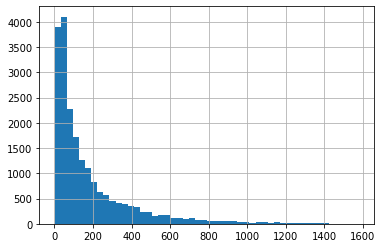

In [32]:
data['days_exposition'].hist(bins=50)

Выбросов в данных нет, поэтому можно спокойно продолжать работу с заменами. Посмотрим, как распределены пропуски по отдельным населенным пунктам:

In [33]:
location_exposition_0 = data.groupby(data[data['days_exposition'].isna()==True]['locality_name'])['locality_name'].count().sort_values(ascending=False)
location_exposition_0

locality_name
Санкт-Петербург       2083
Пушкин                  62
Всеволожск              59
Гатчина                 39
Мурино                  34
                      ... 
деревня Снегиревка       1
деревня Сижно            1
деревня Раздолье         1
деревня Рабитицы         1
село Старая Ладога       1
Name: locality_name, Length: 197, dtype: int64

Определим медианные значения времени размещения объявления для всех населенных пунктов, где это время есть:

In [34]:
exposition_median = data.groupby('locality_name')['days_exposition'].median().sort_values()
exposition_median = exposition_median.dropna()
exposition_median

locality_name
поселок Заводской                5.0
поселок Володарское              5.0
садовое товарищество Садко       7.0
деревня Яльгелево                7.0
коттеджный поселок Счастье       7.0
                               ...  
поселок Любань                 654.0
поселок Коробицыно             750.0
деревня Рабитицы              1007.0
поселок Молодёжное            1043.0
поселок Севастьяново          1069.0
Name: days_exposition, Length: 297, dtype: float64

Напишем функцию для присваивания этих значений для пропусков в соответствующих населенных пунктах:

In [35]:
def insert_exposition(location):
    if location not in exposition_median:
        return np.nan
    return exposition_median[location]

Проверим, что возвращает функция для населенных пунктов, указанных выше:

In [36]:
print('Медиана деревни Рабитицы -', insert_exposition('деревня Рабитицы'))
print('Медиана поселка Володарское -', insert_exposition('поселок Володарское'))

Медиана деревни Рабитицы - 1007.0
Медиана поселка Володарское - 5.0


Функция работает верно. Теперь можно вставлять медианы вместо пропусков. Заодно проверим, сколько значений нам не удалось заменить:

In [37]:
data.loc[data['days_exposition'].isna()==True, 'days_exposition'] = data['locality_name'].apply(insert_exposition)
location_exposition_0 = data.groupby(data[data['days_exposition'].isna()==True]['locality_name'])['locality_name'].count().sort_values(ascending=False)
location_exposition_0

locality_name
Мурино                                               34
поселок Цвелодубово                                   4
поселок Лукаши                                        3
деревня Торошковичи                                   3
деревня Коркино                                       2
поселок Лесное                                        2
деревня Кривко                                        1
поселок Кирпичное                                     1
садовое товарищество Новая Ропша                      1
поселок при железнодорожной станции Приветнинское     1
поселок Шугозеро                                      1
поселок Форт Красная Горка                            1
поселок Рабитицы                                      1
поселок Почап                                         1
поселок Мыза-Ивановка                                 1
деревня Котлы                                         1
поселок Дзержинского                                  1
деревня Курковицы                 

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23689 entries, 0 to 23688
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23689 non-null  int64  
 1   last_price            23689 non-null  float64
 2   total_area            23689 non-null  float64
 3   first_day_exposition  23689 non-null  object 
 4   rooms                 23689 non-null  int64  
 5   ceiling_height        23689 non-null  float64
 6   floors_total          23603 non-null  float64
 7   living_area           23689 non-null  float64
 8   floor                 23689 non-null  int64  
 9   is_apartment          23689 non-null  bool   
 10  studio                23689 non-null  bool   
 11  open_plan             23689 non-null  bool   
 12  kitchen_area          23492 non-null  float64
 13  balcony               23689 non-null  float64
 14  locality_name         23689 non-null  object 
 15  airports_nearest   

Не хватает 71 значения. Их можно как удалить, так и заменить медианой для всего столбца, поскольку количество строк, подлежащих замене, невелико. Принимаем решение, заменить их медианой.

In [39]:
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].median())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23689 entries, 0 to 23688
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23689 non-null  int64  
 1   last_price            23689 non-null  float64
 2   total_area            23689 non-null  float64
 3   first_day_exposition  23689 non-null  object 
 4   rooms                 23689 non-null  int64  
 5   ceiling_height        23689 non-null  float64
 6   floors_total          23603 non-null  float64
 7   living_area           23689 non-null  float64
 8   floor                 23689 non-null  int64  
 9   is_apartment          23689 non-null  bool   
 10  studio                23689 non-null  bool   
 11  open_plan             23689 non-null  bool   
 12  kitchen_area          23492 non-null  float64
 13  balcony               23689 non-null  float64
 14  locality_name         23689 non-null  object 
 15  airports_nearest   

Пропуски в очередном столбце устранены. Двигаемся дальше.

2.1.8 Попробуем указать медианное расстояние до аэропорта в местах пропусков для каждого населенного пункта, но для начала посмотрим, какие в принципе у нас значения в этом столбце:

In [40]:
data['airports_nearest'].describe()

count    18149.000000
mean     28794.886385
std      12632.159972
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37277.000000
max      84869.000000
Name: airports_nearest, dtype: float64

Минимальное расстояние - 0 м. Это явно ошибка. Посмотрим, сколько значений менее 1000 метров (их тоже можно будет заменить медианными):

In [41]:
data[data['airports_nearest']<1000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21078,0,7000000.0,34.7,2018-09-23T00:00:00,1,2.7,9.0,19.8,3,True,...,6.0,2.0,Санкт-Петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0


Всего лишь одно значение. Сделаем его тоже пропущенным:

In [42]:
data.loc[21078, 'airports_nearest'] = np.nan

Повторим шаги из предыдущего пункта и найдем медианы для каждого населенного пункта:

In [43]:
airports_median = data.groupby('locality_name')['airports_nearest'].median().sort_values()
airports_median = airports_median.dropna()
airports_median

locality_name
поселок Александровская    12896.5
Пушкин                     15766.0
поселок Шушары             17427.0
Павловск                   20529.5
поселок Петро-Славянка     20605.0
no_info                    22041.0
Красное Село               25717.0
поселок Металлострой       25758.0
Колпино                    26232.0
поселок Усть-Ижора         26510.5
Санкт-Петербург            26757.5
поселок Стрельна           28317.0
поселок Понтонный          30642.0
поселок Сапёрный           34147.5
Петергоф                   39231.0
Ломоносов                  48415.5
поселок Мурино             51553.0
поселок Левашово           52693.0
поселок Парголово          53426.0
поселок Песочный           54831.5
поселок Лисий Нос          55909.0
Сестрорецк                 56692.0
поселок Белоостров         57769.0
поселок Репино             61797.5
поселок Щеглово            61908.0
Кронштадт                  67850.0
Зеленогорск                72282.0
поселок Молодёжное         84665.0
Name: 

Далеко не для каждого населенного пункта удалось найти медианное расстояние до аэропорта, поэтому все значения, которые нам не удастся заменить, так и оставим без изменений.

In [44]:
def insert_airports(location):
    if location not in airports_median:
        return np.nan
    return airports_median[location]
print('Медианное расстояние до города Пушкин -', insert_airports('Пушкин')) # на всякий случай проверим правильность работы
print('Медианное расстояние до Кронштадта -', insert_airports('Кронштадт'))

Медианное расстояние до города Пушкин - 15766.0
Медианное расстояние до Кронштадта - 67850.0


In [45]:
data.loc[data['airports_nearest'].isna()==True, 'airports_nearest'] = data['locality_name'].apply(insert_airports)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23689 entries, 0 to 23688
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23689 non-null  int64  
 1   last_price            23689 non-null  float64
 2   total_area            23689 non-null  float64
 3   first_day_exposition  23689 non-null  object 
 4   rooms                 23689 non-null  int64  
 5   ceiling_height        23689 non-null  float64
 6   floors_total          23603 non-null  float64
 7   living_area           23689 non-null  float64
 8   floor                 23689 non-null  int64  
 9   is_apartment          23689 non-null  bool   
 10  studio                23689 non-null  bool   
 11  open_plan             23689 non-null  bool   
 12  kitchen_area          23492 non-null  float64
 13  balcony               23689 non-null  float64
 14  locality_name         23689 non-null  object 
 15  airports_nearest   

Удалось ликвидировать всего 678 пропусков. Большего сделать не получится. Перейдем к следующему пункту.

2.1.9 Теперь займемся расстоянием до центра города. Здесь процедуры будут аналогичны тем, что и в случае с расстоянием до аэропорта.

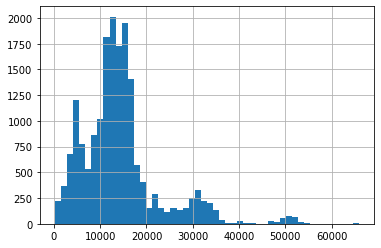

In [46]:
data['cityCenters_nearest'].hist(bins=50)
plt.show()

Каких-либо аномалий нет. Продолжаем.

In [47]:
center_median = data.groupby('locality_name')['cityCenters_nearest'].median().sort_values()
center_median = center_median.dropna()
center_median

locality_name
no_info                     8943.0
Санкт-Петербург            12245.0
поселок Парголово          19311.0
поселок Мурино             21888.0
поселок Стрельна           23506.0
поселок Шушары             24212.0
поселок Левашово           25727.0
поселок Песочный           26099.5
поселок Петро-Славянка     27165.0
поселок Александровская    27468.0
поселок Металлострой       27602.0
Пушкин                     27930.5
поселок Усть-Ижора         28222.5
поселок Лисий Нос          28226.0
Красное Село               29142.0
Колпино                    32018.0
поселок Понтонный          32354.0
Павловск                   32683.0
Петергоф                   33771.0
поселок Щеглово            34085.0
Сестрорецк                 34821.0
поселок Сапёрный           35859.5
поселок Белоостров         38868.0
поселок Репино             42896.5
Кронштадт                  49575.0
Ломоносов                  51677.0
Зеленогорск                53381.0
поселок Молодёжное         65764.0
Name: 

Вновь видим, что информация получена для малого количества населенных пунктов. Изменений внесено будет немного.

In [48]:
def insert_center(location):
    if location not in center_median:
        return np.nan
    return center_median[location]
data.loc[data['cityCenters_nearest'].isna()==True, 'cityCenters_nearest'] = data['locality_name'].apply(insert_center)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23689 entries, 0 to 23688
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23689 non-null  int64  
 1   last_price            23689 non-null  float64
 2   total_area            23689 non-null  float64
 3   first_day_exposition  23689 non-null  object 
 4   rooms                 23689 non-null  int64  
 5   ceiling_height        23689 non-null  float64
 6   floors_total          23603 non-null  float64
 7   living_area           23689 non-null  float64
 8   floor                 23689 non-null  int64  
 9   is_apartment          23689 non-null  bool   
 10  studio                23689 non-null  bool   
 11  open_plan             23689 non-null  bool   
 12  kitchen_area          23492 non-null  float64
 13  balcony               23689 non-null  float64
 14  locality_name         23689 non-null  object 
 15  airports_nearest   

Как и в случае с расстоянием до аэропорта удалось ликвидировать небольшое количество пропусков - всего 655. Больше заменить не удастся.

2.1.10 Переходим к столбцу *parks_nearest*. Здесь вновь повторим те же операции, что и с расстояниями до аэропорта и центра города.

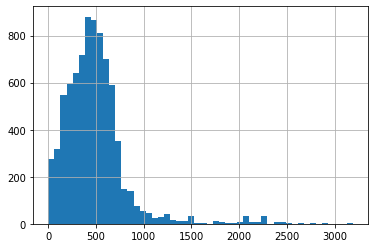

In [49]:
data['parks_nearest'].hist(bins=50)
plt.show()

Убедились, что аномальных значений нет.

In [50]:
parks_median = data.groupby('locality_name')['parks_nearest'].median().sort_values()
parks_median = parks_median.dropna()
parks_median

locality_name
Зеленогорск          147.5
Кронштадт            293.0
Петергоф             294.0
Павловск             312.0
Сестрорецк           367.0
Колпино              393.0
Пушкин               399.5
Ломоносов            407.0
Красное Село         428.5
Санкт-Петербург      460.0
no_info              472.0
поселок Стрельна     700.0
поселок Парголово    733.0
Name: parks_nearest, dtype: float64

Парки тоже есть далеко не в каждом населенном пункте, поэтому, возможно, снова будет внесено мало правок.

In [51]:
def insert_parks(location):
    if location not in parks_median:
        return np.nan
    return parks_median[location]
data.loc[data['parks_nearest'].isna()==True, 'parks_nearest'] = data['locality_name'].apply(insert_parks)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23689 entries, 0 to 23688
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23689 non-null  int64  
 1   last_price            23689 non-null  float64
 2   total_area            23689 non-null  float64
 3   first_day_exposition  23689 non-null  object 
 4   rooms                 23689 non-null  int64  
 5   ceiling_height        23689 non-null  float64
 6   floors_total          23603 non-null  float64
 7   living_area           23689 non-null  float64
 8   floor                 23689 non-null  int64  
 9   is_apartment          23689 non-null  bool   
 10  studio                23689 non-null  bool   
 11  open_plan             23689 non-null  bool   
 12  kitchen_area          23492 non-null  float64
 13  balcony               23689 non-null  float64
 14  locality_name         23689 non-null  object 
 15  airports_nearest   

Было 8075 значений, а стало 17693. Возможно, это связано с тем, что много пропусков было в Санкт-Петербурге. Больше пропусков в этом столбце устранить не удастся.

2.1.11 Переходим к столбцу *parks_around3000*. Выясним, какие уникальные значения здесь есть:

In [52]:
data['parks_around3000'].unique()

array([ 1.,  0.,  2., nan,  3.])

Аномальных значений нет, поэтому достаточно заменить все пропуски на "0", как было предложено в самом начале.

In [53]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23689 entries, 0 to 23688
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23689 non-null  int64  
 1   last_price            23689 non-null  float64
 2   total_area            23689 non-null  float64
 3   first_day_exposition  23689 non-null  object 
 4   rooms                 23689 non-null  int64  
 5   ceiling_height        23689 non-null  float64
 6   floors_total          23603 non-null  float64
 7   living_area           23689 non-null  float64
 8   floor                 23689 non-null  int64  
 9   is_apartment          23689 non-null  bool   
 10  studio                23689 non-null  bool   
 11  open_plan             23689 non-null  bool   
 12  kitchen_area          23492 non-null  float64
 13  balcony               23689 non-null  float64
 14  locality_name         23689 non-null  object 
 15  airports_nearest   

Пропуски устранены.

2.1.12 Теперь изучим столбец *ponds_nearest* по аналогии со столбцом *parks_nearest*.

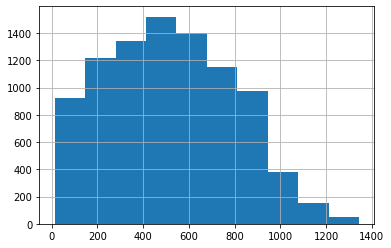

In [54]:
data['ponds_nearest'].hist()
plt.show()

Выбросов также нет. Можем двигаться дальше.

In [55]:
ponds_median = data.groupby('locality_name')['ponds_nearest'].median().sort_values()
ponds_median = ponds_median.dropna()
ponds_median

locality_name
поселок Мурино             133.0
Красное Село               225.5
Кронштадт                  312.0
поселок Белоостров         320.0
Сестрорецк                 372.0
no_info                    374.0
поселок Сапёрный           419.5
Пушкин                     444.0
Павловск                   458.0
Петергоф                   474.0
Санкт-Петербург            503.0
Зеленогорск                507.0
Колпино                    509.0
Ломоносов                  553.0
поселок Шушары             584.5
поселок Парголово          593.0
поселок Понтонный          638.0
поселок Петро-Славянка     663.0
поселок Александровская    711.5
поселок Стрельна           859.0
Name: ponds_nearest, dtype: float64

In [56]:
def insert_ponds(location):
    if location not in ponds_median:
        return np.nan
    return ponds_median[location]
data.loc[data['ponds_nearest'].isna()==True, 'ponds_nearest'] = data['locality_name'].apply(insert_ponds)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23689 entries, 0 to 23688
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23689 non-null  int64  
 1   last_price            23689 non-null  float64
 2   total_area            23689 non-null  float64
 3   first_day_exposition  23689 non-null  object 
 4   rooms                 23689 non-null  int64  
 5   ceiling_height        23689 non-null  float64
 6   floors_total          23603 non-null  float64
 7   living_area           23689 non-null  float64
 8   floor                 23689 non-null  int64  
 9   is_apartment          23689 non-null  bool   
 10  studio                23689 non-null  bool   
 11  open_plan             23689 non-null  bool   
 12  kitchen_area          23492 non-null  float64
 13  balcony               23689 non-null  float64
 14  locality_name         23689 non-null  object 
 15  airports_nearest   

Было 9105 значений, стало 18719. Причина такого большого "заполнения", думаю, аналогична - большинство пропусков было в Санкт-Петербурге. Больше пропусков здесь ликвидировать не получится.

2.1.13 Перейдем к последнему столбцу, в котором устраним пропуски - *ponds_around3000*. Здесь все операции повторяют п. 2.1.11:

In [57]:
data['ponds_around3000'].unique()

array([ 2.,  0.,  3.,  1., nan])

Каких-то аномалий нет, поэтому просто заменим пропуски нулем.

In [58]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23689 entries, 0 to 23688
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23689 non-null  int64  
 1   last_price            23689 non-null  float64
 2   total_area            23689 non-null  float64
 3   first_day_exposition  23689 non-null  object 
 4   rooms                 23689 non-null  int64  
 5   ceiling_height        23689 non-null  float64
 6   floors_total          23603 non-null  float64
 7   living_area           23689 non-null  float64
 8   floor                 23689 non-null  int64  
 9   is_apartment          23689 non-null  bool   
 10  studio                23689 non-null  bool   
 11  open_plan             23689 non-null  bool   
 12  kitchen_area          23492 non-null  float64
 13  balcony               23689 non-null  float64
 14  locality_name         23689 non-null  object 
 15  airports_nearest   

Замены произведены.

**Общий вывод для п.2.1 (удаление пропусков).**

Большая часть пропусков, которые нам удалось устранить, являются добавленными пользователем. Где были очевидные ошибки при внесении сведений пользователем (как, например, в столбце *ceiling_height*) мы просто внесли изменения, исходя из логических соображений. Основным способом устранения пропусков была выбрана "медианная замена", так как медианные значения оказывают наименьшее влияние на средние показатели в целом по таблице. Что касается картографических данных, здесь тоже использовали замену медианными значениями. Однако, удивителен тот факт, что по многим населенным пунктам сведения о расстояниях до их центра либо до аэропорта в принципе отсутствуют. Возможно, это вызвано какой-либо ошибкой сервиса.

Далее будет проведена работа по изменению типов данных в столбцах таблицы *data*, где это допустимо.

**2.2 Изменение типов данных.**

Выведем общую информацию о таблице и первые 5 строк:

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23689 entries, 0 to 23688
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23689 non-null  int64  
 1   last_price            23689 non-null  float64
 2   total_area            23689 non-null  float64
 3   first_day_exposition  23689 non-null  object 
 4   rooms                 23689 non-null  int64  
 5   ceiling_height        23689 non-null  float64
 6   floors_total          23603 non-null  float64
 7   living_area           23689 non-null  float64
 8   floor                 23689 non-null  int64  
 9   is_apartment          23689 non-null  bool   
 10  studio                23689 non-null  bool   
 11  open_plan             23689 non-null  bool   
 12  kitchen_area          23492 non-null  float64
 13  balcony               23689 non-null  float64
 14  locality_name         23689 non-null  object 
 15  airports_nearest   

In [60]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,True,...,25.000000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.600000,1,True,...,11.000000,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,584.5,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.300000,4,True,...,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,98.013642,9,True,...,20.691783,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,True,...,41.000000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Для удобства работы произведем замены типов данных в следующих столбцах:

* "first_day_exposition" - 'object' --> 'datetime'
* "balcony" -              'float64' --> 'int64'
* "parks_around3000" -     'float64' --> 'int64'
* "ponds_around3000" -     'float64' --> 'int64'
* "days_exposition" -      'float64' --> 'int64'

В первом случае замена необходима, поскольку для анализа нас будет интересовать только дата размещения объявления. В остальных случаях значения в столбцах принимают целые значения, и нам нет смысла их оставлять вещественными.

In [61]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')
data['balcony'] = data['balcony'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
data['days_exposition'] = data['days_exposition'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23689 entries, 0 to 23688
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23689 non-null  int64         
 1   last_price            23689 non-null  float64       
 2   total_area            23689 non-null  float64       
 3   first_day_exposition  23689 non-null  datetime64[ns]
 4   rooms                 23689 non-null  int64         
 5   ceiling_height        23689 non-null  float64       
 6   floors_total          23603 non-null  float64       
 7   living_area           23689 non-null  float64       
 8   floor                 23689 non-null  int64         
 9   is_apartment          23689 non-null  bool          
 10  studio                23689 non-null  bool          
 11  open_plan             23689 non-null  bool          
 12  kitchen_area          23492 non-null  float64       
 13  balcony         

In [62]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,True,...,25.000000,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,95
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.600000,1,True,...,11.000000,2,поселок Шушары,12817.0,18603.0,0,NaN,0,584.5,81
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.300000,4,True,...,8.300000,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,98.013642,9,True,...,20.691783,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,True,...,41.000000,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121


Типы данных преобразованы. Можем перейти к следующему этапу - поиску дубликатов.

**2.3 Поиск дубликатов.**

Будем искать совпадения по тем столбцам, где мы практически не вносили изменений: 
    
   * total_images;
   * last_price;
   * total_area;
   * first_day_exposition.

Кроме того, что мы изменения здесь внесли только в столбец "first_day_exposition", 
так и значения в этих столбцах крайне маловероятно могут случайно повториться.

In [63]:
data_duplicated = data[data[['total_images', 'last_price','total_area','first_day_exposition']].duplicated(keep=False)]
data_duplicated.sort_values(by='first_day_exposition')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19045,3,4370000.0,38.00,2016-06-23,1,2.65,9.0,19.500000,1,True,...,9.414196,0,Санкт-Петербург,27103.0,7640.0,1,624.0,0,503.0,620
19318,3,4370000.0,38.00,2016-06-23,1,2.65,9.0,18.308248,2,True,...,9.414196,0,Санкт-Петербург,27103.0,7640.0,1,624.0,0,503.0,620
9658,1,2533531.0,42.50,2016-09-08,1,2.56,18.0,19.800000,7,False,...,10.529035,0,Никольское,NaN,NaN,0,NaN,0,NaN,627
18418,1,2533531.0,42.50,2016-09-08,1,2.56,18.0,20.000000,10,False,...,10.529035,0,Никольское,NaN,NaN,0,NaN,0,NaN,627
10096,10,4400000.0,44.00,2017-11-22,1,2.65,17.0,17.000000,14,True,...,13.000000,2,Санкт-Петербург,42901.0,9267.0,0,460.0,0,503.0,71
21135,10,4400000.0,44.00,2017-11-22,2,2.65,9.0,27.000000,8,True,...,6.000000,1,Санкт-Петербург,49917.0,16755.0,1,235.0,0,503.0,72
14736,10,5142565.0,54.65,2018-10-01,2,2.65,5.0,26.000000,3,True,...,9.073977,0,Санкт-Петербург,47303.0,25866.0,1,251.0,1,350.0,145
18617,10,5142565.0,54.65,2018-10-01,2,2.65,5.0,26.000000,5,True,...,9.073977,0,Санкт-Петербург,47303.0,25866.0,1,251.0,1,350.0,145


Мы получили 4 пары возможных дубликатов:

1) Строки с индексами 19045 и 19318: все данные одинаковы кроме "living_area" (это явно замененное нами значение) и "floor" (возможен ошибочный ввод пользователем). Одну из строк можно удалить, например 19318.

2) Строки с индексами 9658 и 18418: здесь также практически идентичны все данные кроме этажа и жилой площади, поэтому удалим строку 18418.

3) Строки с индексами 10096 и 21135: здесь данные похожи, но отличий все равно достаточно, поэтому эту пару оставляем.

4) Строки с индексами 14736 и 18617: отличается только этаж, поэтому удалим строку 18617.

Итого: удаляем 3 строки с индексами 18418, 18617 и 19318.

Убедимся, что не удалим ничего лишнего:

In [64]:
print('Число строк с дубликатами',len(data))
data.drop([18418,18617,19318], axis=0, inplace=True)
print('Число строк без дубликатов',len(data))

Число строк с дубликатами 23689
Число строк без дубликатов 23686


In [65]:
data.reset_index(drop=True, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23686 entries, 0 to 23685
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23686 non-null  int64         
 1   last_price            23686 non-null  float64       
 2   total_area            23686 non-null  float64       
 3   first_day_exposition  23686 non-null  datetime64[ns]
 4   rooms                 23686 non-null  int64         
 5   ceiling_height        23686 non-null  float64       
 6   floors_total          23600 non-null  float64       
 7   living_area           23686 non-null  float64       
 8   floor                 23686 non-null  int64         
 9   is_apartment          23686 non-null  bool          
 10  studio                23686 non-null  bool          
 11  open_plan             23686 non-null  bool          
 12  kitchen_area          23489 non-null  float64       
 13  balcony         

От дубликатов избавились. В следующем шаге пройдем по столбцам, которые мы не проверяли на аномальные значения.

**2.4 Поиск аномалий.**

В процессе устранения пропусков мы избавились от аномальных значений (и объяснили возможную природу их появления) в некоторых столбцах: 

* airports_nearest - здесь было нулевое расстояние в одном случае;
* ceiling_height - здесь были ошибки, вызванные отсутствием запятой, вследствие чего были потолки высотой от 19 до 36 метров, а также был 100 м потолок и слишком низкие потолки от 1 до 1,8 м, от которых мы избавились.

Остается проверить значения в столбцах:

* last_price;
* total_area;
* floor;
* floors_total.

Остальные столбцы оставим без исследования, поскольку они никак не повлияют на него в дальнейшем.

In [66]:
data['last_price'].describe()

count    2.368600e+04
mean     6.542287e+06
std      1.088969e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

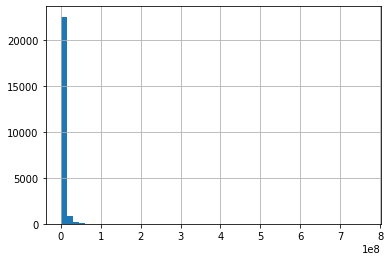

In [67]:
data['last_price'].hist(bins=50)
plt.show()

На таком масштабе плохо видно распределение. Разобьем на 3 части:

* менее 500000;
* от 500000 до 40000000;
* от 40000000 до 100000000.

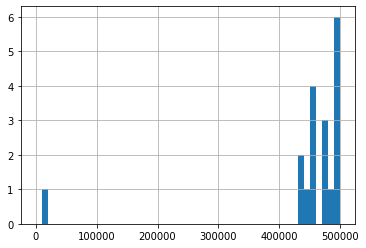

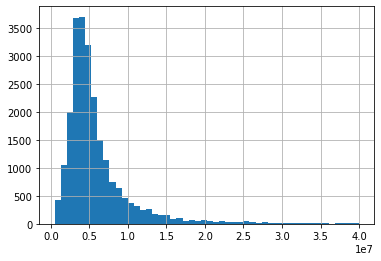

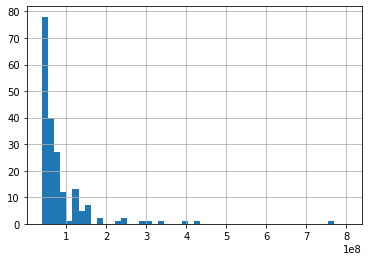

In [68]:
data['last_price'].hist(bins=50, range=(0,500000))
plt.show()
data['last_price'].hist(bins=50, range=(500000,40000000))
plt.show()
data['last_price'].hist(bins=50, range=(40000000, 800000000))
plt.show()

Как видно по приведенным гистограммам, большого количества выбросов нет. Поэтому рассмотрим только минимальное и максимальное значения.

In [69]:
index_last_price_min_max = data.query('last_price < 200000 or last_price > 700000000').index
data.loc[index_last_price_min_max, 'last_price']

8790         12190.0
12968    763000000.0
Name: last_price, dtype: float64

In [70]:
print(data.loc[8790])
print()
print(data.loc[12968])

total_images                              7
last_price                          12190.0
total_area                            109.0
first_day_exposition    2019-03-20 00:00:00
rooms                                     2
ceiling_height                         2.75
floors_total                           25.0
living_area                            32.0
floor                                    25
is_apartment                           True
studio                                False
open_plan                             False
kitchen_area                           40.5
balcony                                   0
locality_name               Санкт-Петербург
airports_nearest                    36421.0
cityCenters_nearest                  9176.0
parks_around3000                          1
parks_nearest                         805.0
ponds_around3000                          0
ponds_nearest                         503.0
days_exposition                           8
Name: 8790, dtype: object

total

По квартире с максимальной ценой вопросов нет. Ее площадь и расположение согласно приведенным данным может соответствовать такой цене. Что касается квартиры с минимальной ценой, то здесь явно была ошибка при ее указании - возможно, что стоимость была приведена в тысячах тысяч. Значит, для исправления нам необходимо эту цену умножить на 1000. Тогда будет получена адекватная цена для такой квартиры.

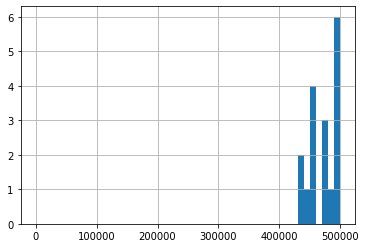

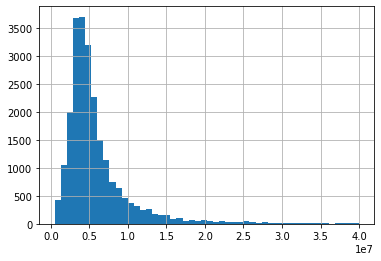

In [71]:
data.loc[8790, 'last_price'] = data.loc[8790,'last_price']*1000
data['last_price'].hist(bins=50, range=(0,500000))
plt.show()
data['last_price'].hist(bins=50, range=(500000,40000000))
plt.show()

Как видим по гистограммам, от аномального выброса избавились. Можем теперь рассмотреть оставшиеся столбцы.

Сначала рассмотрим столбец "total_area".

In [72]:
data['total_area'].describe()

count    23686.000000
mean        60.356638
std         35.661295
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

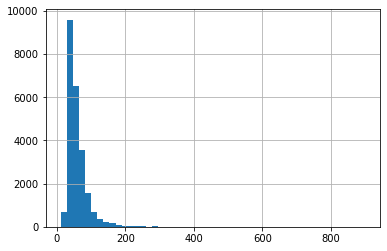

In [73]:
data['total_area'].hist(bins=50)
plt.show()

Здесь также разобъем на 3 интервала:

* до 20 кв.м.;
* от 20 до 200 кв.м.;
* от 200 до 900 кв.м.

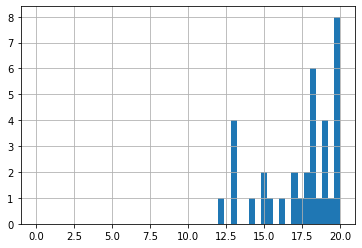

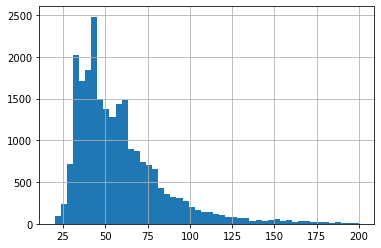

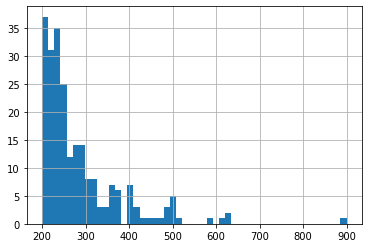

In [74]:
data['total_area'].hist(bins=50, range=(0,20))
plt.show()
data['total_area'].hist(bins=50, range=(20,200))
plt.show()
data['total_area'].hist(bins=50, range=(200,900))
plt.show()

Каких-либо аномальных значений здесь нет. Можем оставить этот столбец без изменений.

Теперь перейдем к столбцу "floor":

In [75]:
data['floor'].describe()

count    23686.000000
mean         5.892468
std          4.885452
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

Здесь нет никаких выдающихся значений, поэтому тоже изменения не вносим.

Рассмотрим столбец "floors_total":

In [76]:
data['floors_total'].describe()

count    23600.000000
mean        10.672924
std          6.595613
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

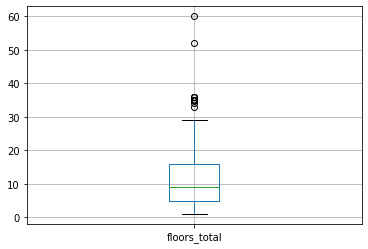

In [77]:
data.boxplot(column='floors_total')
plt.show()

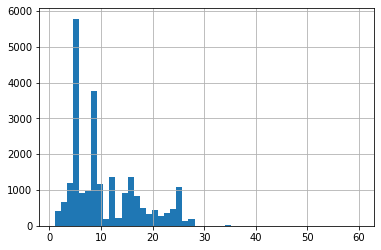

In [78]:
data['floors_total'].hist(bins=50)
plt.show()

Здесь мы тоже не видим никаких аномалий. 

В конечном итоге наш датафрейм свободен от аномальных значений.
Можем двигаться дальше.

**2.5 Окончательная подготовка датафрейма**

Еще раз выведем основную информацию о датафрейме и первые пять строк:

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23686 entries, 0 to 23685
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23686 non-null  int64         
 1   last_price            23686 non-null  float64       
 2   total_area            23686 non-null  float64       
 3   first_day_exposition  23686 non-null  datetime64[ns]
 4   rooms                 23686 non-null  int64         
 5   ceiling_height        23686 non-null  float64       
 6   floors_total          23600 non-null  float64       
 7   living_area           23686 non-null  float64       
 8   floor                 23686 non-null  int64         
 9   is_apartment          23686 non-null  bool          
 10  studio                23686 non-null  bool          
 11  open_plan             23686 non-null  bool          
 12  kitchen_area          23489 non-null  float64       
 13  balcony         

In [80]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,True,...,25.000000,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,95
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.600000,1,True,...,11.000000,2,поселок Шушары,12817.0,18603.0,0,NaN,0,584.5,81
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.300000,4,True,...,8.300000,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,98.013642,9,True,...,20.691783,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,True,...,41.000000,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121


Как ранее в п.2.1 было отмечено, мы имели пропуски в столбцах *locality_name* и *floors_total*. В первом случае мы заменили пропуски на значение "no_info", а во втором случае оставили без изменений. Однако, после удаления пропусков в других столбцах, можно сделать вывод, что удаление строк со значениями "no_info" в *locality_name* и с пропусками в *floors_total* не приведет к сильным изменениям датафрейма. К тому же по данным строкам невозможно будет произвести полноценный анализ. Поэтому избавимся еще от этих строк.

In [81]:
data = data.dropna(subset=['floors_total']) # избавились от пропусков в *floors_total*
data.reset_index(drop=True, inplace=True)
data['floors_total'] = data['floors_total'].astype('int') # переведем в целые числа, поскольку теперь пропусков нет
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23600 entries, 0 to 23599
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23600 non-null  int64         
 1   last_price            23600 non-null  float64       
 2   total_area            23600 non-null  float64       
 3   first_day_exposition  23600 non-null  datetime64[ns]
 4   rooms                 23600 non-null  int64         
 5   ceiling_height        23600 non-null  float64       
 6   floors_total          23600 non-null  int64         
 7   living_area           23600 non-null  float64       
 8   floor                 23600 non-null  int64         
 9   is_apartment          23600 non-null  bool          
 10  studio                23600 non-null  bool          
 11  open_plan             23600 non-null  bool          
 12  kitchen_area          23406 non-null  float64       
 13  balcony         

In [82]:
data = data.loc[data['locality_name']!='no_info']
data.reset_index(drop=True, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23552 entries, 0 to 23551
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23552 non-null  int64         
 1   last_price            23552 non-null  float64       
 2   total_area            23552 non-null  float64       
 3   first_day_exposition  23552 non-null  datetime64[ns]
 4   rooms                 23552 non-null  int64         
 5   ceiling_height        23552 non-null  float64       
 6   floors_total          23552 non-null  int64         
 7   living_area           23552 non-null  float64       
 8   floor                 23552 non-null  int64         
 9   is_apartment          23552 non-null  bool          
 10  studio                23552 non-null  bool          
 11  open_plan             23552 non-null  bool          
 12  kitchen_area          23358 non-null  float64       
 13  balcony         

В конечном итоге мы получили датафрейм с 23552 строками (исходный датафрейм имел 23699 строк). Таким образом были удалены 147 строк (т.е. 0,62 % исходного материала), что является незначительным количеством. Следовательно можно переходить к следующему этапу работы над проектом.

**Вывод по пункту 2 (предобработка данных).**

Были произведены следующие этапы подготовки датафрейма к дальнейшему анализу:

* устранение пропущенных значений;
* изменение типов данных;
* удаление дубликатов;
* поиск и устранение аномалий.

В результате датафрейм был сокращен на 0,62 % от исходного состояния. Для работы с данными такое количество "потерянных" строк не является критическим.

### Посчитайте и добавьте в таблицу новые столбцы

Для дальнейшей работы нам необходимо добавить следующие столбцы в нашу таблицу: 

* цена одного квадратного метра;
* день публикации объявления (0 - понедельник, 1 - вторник и т.д.);
* месяц публикации объявления;
* год публикации объявления;
* тип этажа квартиры (значения — «первый», «последний», «другой»);
* расстояние в км до центра города.

Рассчитаем цену одного квадратного метра и добавим его в таблицу:

In [83]:
data['price_1m'] = data['last_price']/data['total_area']
data['price_1m'] = data['price_1m'].astype('int') # пусть лучше цена одного "квадрата" будет целочисленной (это удобно для анализа)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_1m
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,True,...,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,95,120370
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.600000,1,True,...,2,поселок Шушары,12817.0,18603.0,0,NaN,0,584.5,81,82920
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.300000,4,True,...,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,98.013642,9,True,...,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,True,...,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000


Теперь внесем в таблицу день, месяц и год публикации объявления:

In [84]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_1m,weekday_exposition,month_exposition,year_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,True,...,16028.0,1,482.0,2,755.0,95,120370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.600000,1,True,...,18603.0,0,NaN,0,584.5,81,82920,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.300000,4,True,...,13933.0,1,90.0,2,574.0,558,92785,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,98.013642,9,True,...,6800.0,2,84.0,3,234.0,424,408176,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,True,...,8098.0,2,112.0,1,48.0,121,100000,1,6,2018


Теперь укажем тип этажа квартиры. Для этого введем функцию "floor_classification":

In [85]:
data['floor_classification'] = np.nan

def floor_classification(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'     

data['floor_classification'] = data.apply(floor_classification, axis=1)

In [86]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_1m,weekday_exposition,month_exposition,year_exposition,floor_classification
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,True,...,1,482.0,2,755.0,95,120370,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.600000,1,True,...,0,NaN,0,584.5,81,82920,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.300000,4,True,...,1,90.0,2,574.0,558,92785,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,98.013642,9,True,...,2,84.0,3,234.0,424,408176,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,True,...,2,112.0,1,48.0,121,100000,1,6,2018,другой


Убедимся, что функция работает и для присвоения "последнего" этажа:

In [87]:
data.loc[data['floor']==data['floors_total']]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_1m,weekday_exposition,month_exposition,year_exposition,floor_classification
12,10,3890000.0,54.0,2016-06-30,2,2.65,5,30.0,5,True,...,0,NaN,0,NaN,90,72037,3,6,2016,последний
13,20,3550000.0,42.8,2017-07-01,2,2.56,5,27.0,5,True,...,1,294.0,3,298.0,366,82943,5,7,2017,последний
23,11,2950000.0,32.0,2016-10-29,1,2.60,9,17.7,9,True,...,2,517.0,1,190.0,615,92187,5,10,2016,последний
36,13,3790000.0,45.0,2017-01-25,2,2.65,9,27.0,9,False,...,1,459.0,0,503.0,139,84222,2,1,2017,последний
43,13,9330000.0,48.0,2017-01-10,2,3.00,4,28.0,4,True,...,0,460.0,1,492.0,763,194375,1,1,2017,последний
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23495,3,3100000.0,30.0,2018-03-28,1,2.50,5,17.0,5,True,...,0,393.0,0,509.0,10,103333,2,3,2018,последний
23498,7,4990000.0,62.5,2018-04-26,2,2.70,4,32.3,4,True,...,1,560.0,1,171.0,166,79840,3,4,2018,последний
23502,14,10100000.0,78.0,2017-05-12,3,3.27,5,48.6,5,True,...,1,621.0,2,117.0,621,129487,4,5,2017,последний
23513,1,2950000.0,53.6,2018-02-01,2,2.75,3,32.0,3,False,...,0,428.5,0,225.5,35,55037,3,2,2018,последний


Все верно, столбец добавлен корректно. 

Теперь добавим последний столбец, необходимый для анализа: расстояние в км до центра города.

In [88]:
data['cityCenters_km'] = round(data['cityCenters_nearest']/1000, 0)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_1m,weekday_exposition,month_exposition,year_exposition,floor_classification,cityCenters_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,True,...,482.0,2,755.0,95,120370,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.600000,1,True,...,NaN,0,584.5,81,82920,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.300000,4,True,...,90.0,2,574.0,558,92785,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,98.013642,9,True,...,84.0,3,234.0,424,408176,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,True,...,112.0,1,48.0,121,100000,1,6,2018,другой,8.0


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23552 entries, 0 to 23551
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23552 non-null  int64         
 1   last_price            23552 non-null  float64       
 2   total_area            23552 non-null  float64       
 3   first_day_exposition  23552 non-null  datetime64[ns]
 4   rooms                 23552 non-null  int64         
 5   ceiling_height        23552 non-null  float64       
 6   floors_total          23552 non-null  int64         
 7   living_area           23552 non-null  float64       
 8   floor                 23552 non-null  int64         
 9   is_apartment          23552 non-null  bool          
 10  studio                23552 non-null  bool          
 11  open_plan             23552 non-null  bool          
 12  kitchen_area          23358 non-null  float64       
 13  balcony         

**Вывод по пункту 3.**

В таблицу добавлены следующие столбцы:

* цена одного квадратного метра;
* день публикации объявления (0 - понедельник, 1 - вторник и т.д.);
* месяц публикации объявления;
* год публикации объявления;
* тип этажа квартиры (значения — «первый», «последний», «другой»);
* расстояние в км до центра города.

Теперь можно переходить к анализу данных.

### Проведите исследовательский анализ данных

**4.1 Начнем с построения гистограмм для следующих параметров:**

* общая площадь;
* жилая площадь;
* площадь кухни;
* цена объекта;
* количество комнат;
* высота потолков;
* этаж квартиры;
* тип этажа квартиры;
* общее количество этажей в доме;
* расстояние до центра города в метрах;
* расстояние до ближайшего аэропорта;
* расстояние до ближайшего парка;
* день и месяц публикации объявления.


**4.1.1 Общая площадь - "total_area".**

In [90]:
data['total_area'].describe()

count    23552.000000
mean        60.330842
std         35.664319
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

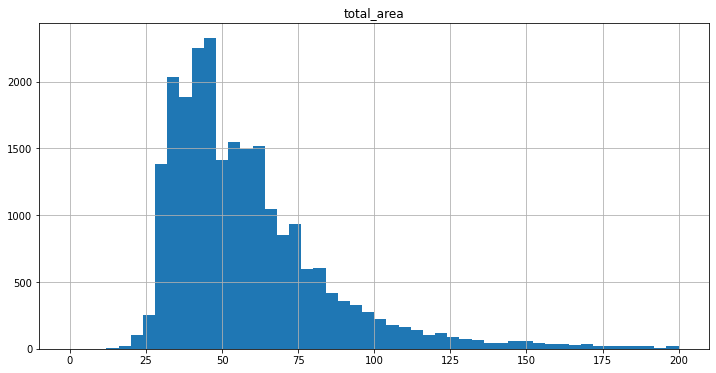

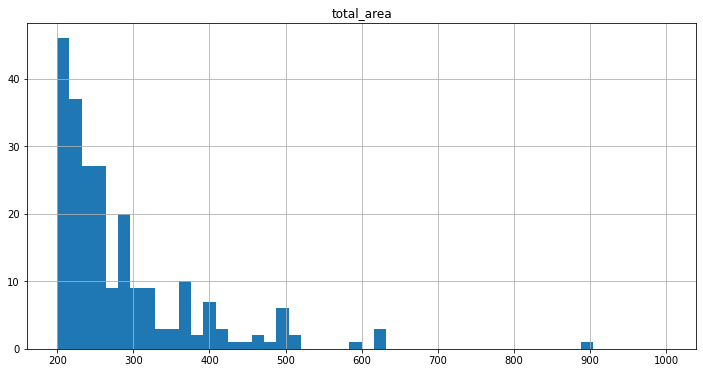

In [91]:
data.hist('total_area', bins=50, range=(0,200), figsize=(12,6))
plt.show()
data.hist('total_area', bins=50, range=(200,1000), figsize=(12,6))
plt.show()

Как видно из гистограммы, основную долю рынка занимают квартиры с площадью от 30 до 50 квадратных метров (т.е., предположительно однокомнтаные и двухкомнатные квартиры). Количество квартир с площадью более 60 квадратных метров резко снижается. Самая большая площадь квартиры - 900 кв. метров. Квартир с очень маленькой площадью (до 25 кв. метров) тоже немного.

**4.1.2 Жилая площадь - "living_area".**

In [92]:
data['living_area'].describe()

count    23552.000000
mean        34.641012
std         22.770772
min          2.000000
25%         18.700000
50%         30.000000
75%         42.300000
max        427.546670
Name: living_area, dtype: float64

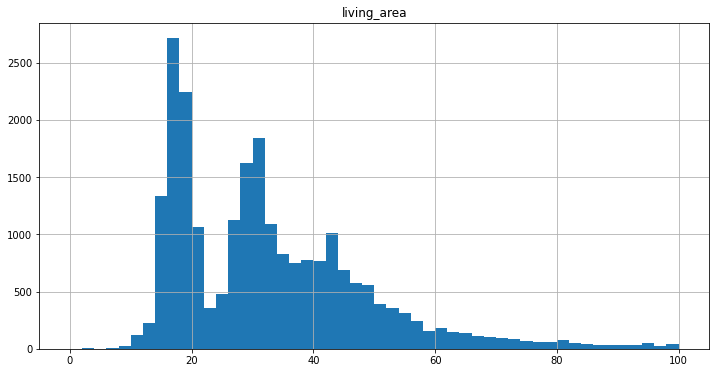

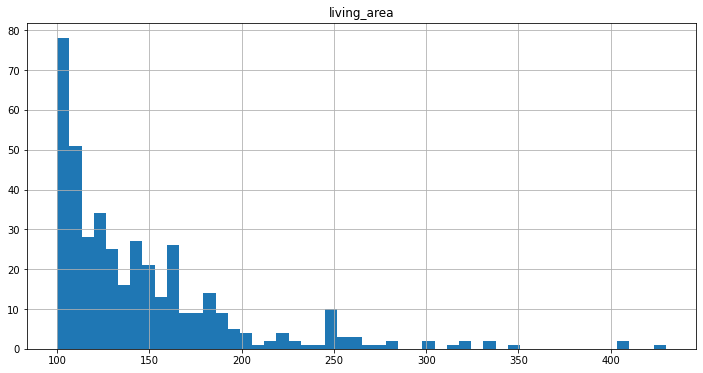

In [93]:
data.hist('living_area', bins=50, range = (0,100), figsize=(12,6))
plt.show()
data.hist('living_area', bins=50, range = (100,430), figsize=(12,6))
plt.show()

На первой гистограмме можно заметить 2 пика - около 18-19 кв. метров и около 30 кв. метров. Предположительно, это вызвано тем, что основную долю рынка составляют одно- и двухкомнатные квартиры. Также здесь на первый пик могли оказать влияние и студии, поскольку их жилая площадь в среднем как раз близка к 20 кв. метрам. Среди очень маленьких жилых площадей бросается в глаза значение 2 кв. метра. Оно было случайно пропущено при "ликвидации" аномалий (но поскольку оно не повлияет на анализ, не будем возвращаться к его исправлению).

**4.1.3 Площадь кухни - "kitchen_area".**

In [94]:
data['kitchen_area'].describe()

count    23358.000000
mean        10.494336
std          5.805840
min          1.300000
25%          7.100000
50%          9.100000
75%         11.800000
max        122.409322
Name: kitchen_area, dtype: float64

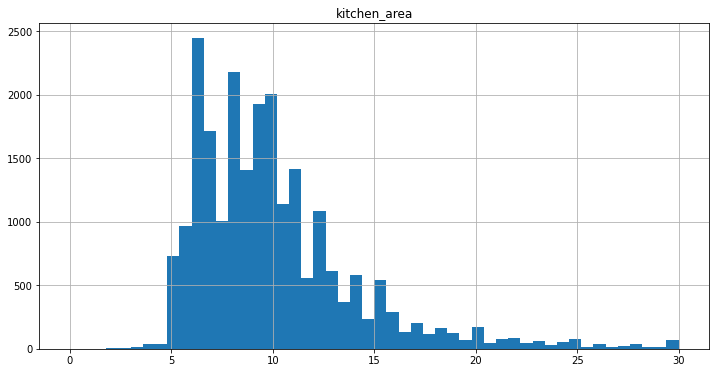

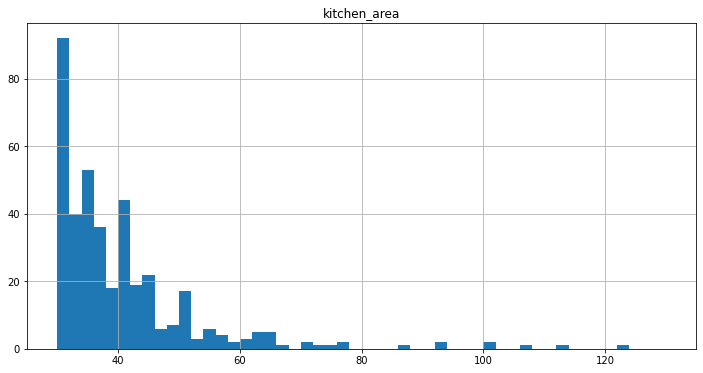

In [95]:
data.hist('kitchen_area', bins=50,range=(0,30),figsize=(12,6))
plt.show()
data.hist('kitchen_area', bins=50, range=(30,130), figsize=(12,6))
plt.show()

Здесь тоже ничего удивительного нет - площадь кухни, в основном, лежит в интервале от 6 до 11 кв. метров, что вновь соответствует среднестатистическим квартирам. Кухни с площадью меньше 5 и больше 16 кв. метров уже являются редкостью.

**4.1.4 Цена объекта - "last_price".** 

In [96]:
data['last_price'].describe()

count    2.355200e+04
mean     6.541317e+06
std      1.091362e+07
min      4.300000e+05
25%      3.400000e+06
50%      4.646000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

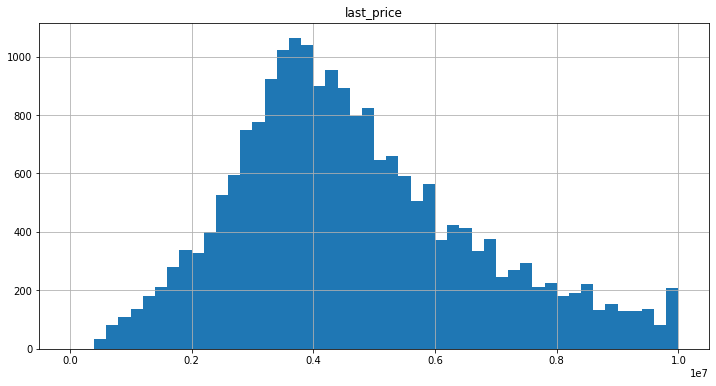

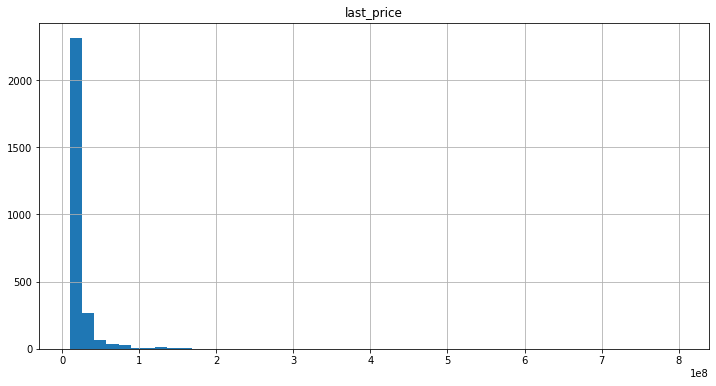

In [97]:
data.hist('last_price', bins=50, range=(0,10000000) , figsize=(12,6))
plt.show()
data.hist('last_price', bins=50, range=(10000000, 800000000) , figsize=(12,6))
plt.show()

Здесь также не наблюдаются какие-либо странные вещи - количество квартир с ценой примерно до 3,5-3,9 млн. рублей равномерно растет, достигая пика. После этого значения количество квартир с ценой выше пиковой также равномерно снижается. Здесь выделяется квартира с максимальной стоимостью в 763 млн. рублей, но как было изучено ранее, это просто уникальная квартира (ошибки в данных нет).

**4.1.5 Количество комнат - "rooms".**

In [98]:
data['rooms'].describe()

count    23552.000000
mean         2.070949
std          1.078713
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

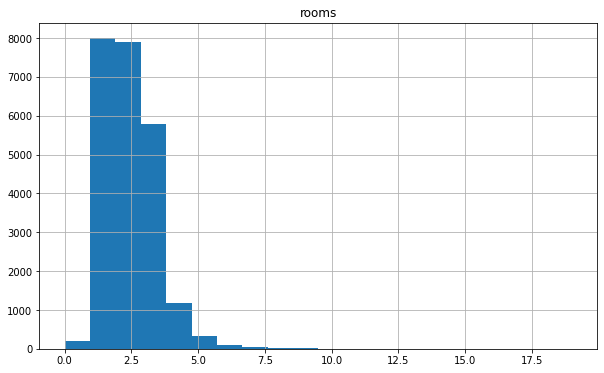

In [99]:
data.hist('rooms', bins=20, figsize=(10,6))
plt.show()

Здесь подтверждается наше предположение, что основную долю объявлений составляют одно- и двухкомнатные квартиры (около 8000 объявлений каждая). Трехкомнатных квартир уже меньше - около 6000 объявлений. Четырехкомнатных квартир тоже немало - чуть более 1000 объявлений. Остальные квартиры представлены уже крайне редко.

**4.1.6 Высота потолков - "ceiling_height".**

In [100]:
data['ceiling_height'].describe()

count    23552.000000
mean         2.696907
std          0.221475
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          6.000000
Name: ceiling_height, dtype: float64

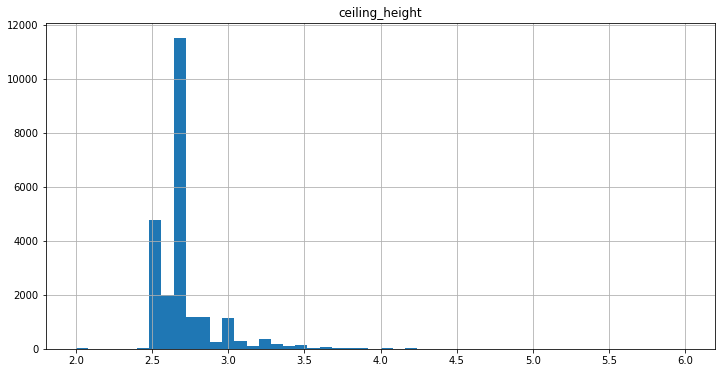

In [101]:
data.hist('ceiling_height', bins=50, figsize=(12,6))
plt.show()

С высотой потолков тоже все понятно - в основном их высота составляет от 2,4 до 2,7 метра. Ранее при удалении пропусков мы условились заменить пропуски медианным значением - 2,65 метра, что дополнительно увеличило количество квартир с потолками такой высоты.

**4.1.7 Этаж квартиры - "floor".**

In [102]:
data['floor'].describe()

count    23552.000000
mean         5.878227
std          4.871683
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

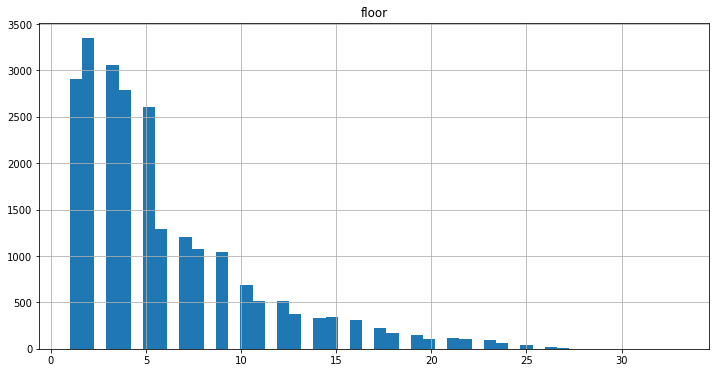

In [103]:
data.hist('floor', bins=50, figsize=(12,6))
plt.show()

Интересно, что квартиры, указанные в объявлениях, в основном находятся на этажах с 1 по 5. Предположительно это связано с тем, что много объявлений о продаже квартир выставлено в пятиэтажных домах. Понятно, что в домах с большей этажностью квартиры тоже продаются на этажах с 1 по 5. Далее будет еще изучено, в каких домах выставлено большинство объявлений.


**4.1.8 Тип этажа квартиры - "floor_classification".**

In [104]:
floor_classification = data.groupby('floor_classification')['floor'].count()
floor_classification

floor_classification
другой       17317
первый        2907
последний     3328
Name: floor, dtype: int64

Здесь можем обойтись без гистограммы, поскольку данные легко интерпретировать.

В основном продаются квартиры, расположенные не на крайних этажах. Хуже всего продажи обстоят с квартирами, расположенными на первых этажах.

**4.1.9 Общее количество этажей в доме - "floors_total".**

In [105]:
data['floors_total'].describe()

count    23552.000000
mean        10.674975
std          6.593259
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

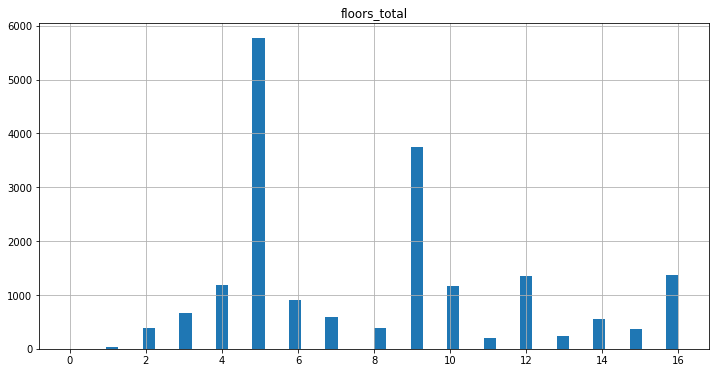

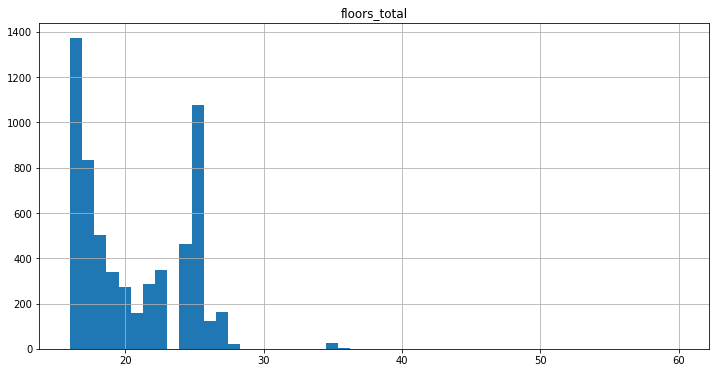

In [106]:
data.hist('floors_total',bins=50, range=(0,16), figsize=(12,6))
plt.show()
data.hist('floors_total',bins=50, range=(16,60), figsize=(12,6))
plt.show()

Как предполагалось в пункте 4.1.7 пятиэтажных домов действительно гораздо больше в объявлениях, чем всех остальных - практически 6000. Далее следуют девятиэтажные дома - их примерно 3800. Остальные дома представлены менее широко.

**4.1.10 Расстояние до центра города - "cityCenters_nearest".**

In [107]:
data['cityCenters_nearest'].describe()

count    18697.000000
mean     14445.266594
std       8603.733915
min        181.000000
25%       9481.000000
50%      13263.000000
75%      16722.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

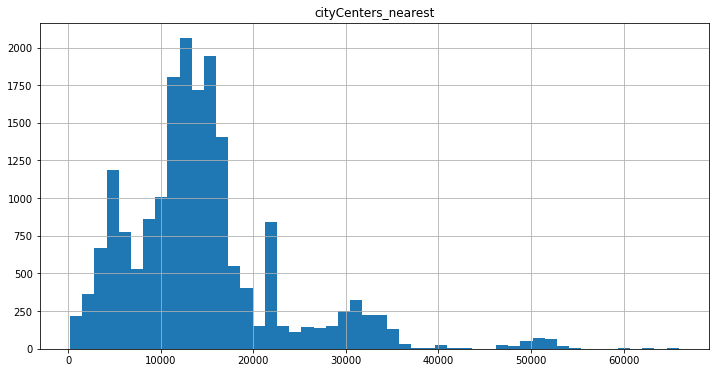

In [108]:
data.hist('cityCenters_nearest', bins=50, figsize=(12,6))
plt.show()

Здесь мы имеем несколько пиков разной степени выраженности:

* около 5000 метров;
* от 11000 до 16000 метров;
* около 30000 метров;
* около 50000 метров.

Первый пик может быть вызван тем, что много объявлений размещено в небольших городах, где расстояние до центра города будет невелико. 

Второй пик типичен для крупных городов (в нашем случае - Санкт-Петербург). Здесь основные продажи приходятся на квартиры, которые расположены не на очень большом расстоянии до центра города.

Третий и четвертый пики типичны также для больших городов (это типичные спальные районы, расположенные на очень большом расстоянии до центра города).

**4.1.11 Расстояние до ближайшего аэропорта - "airports_nearest".**

In [109]:
data['airports_nearest'].describe()

count    18697.000000
mean     29501.271969
std      13042.521907
min       6450.000000
25%      18786.000000
50%      27179.000000
75%      38510.000000
max      84869.000000
Name: airports_nearest, dtype: float64

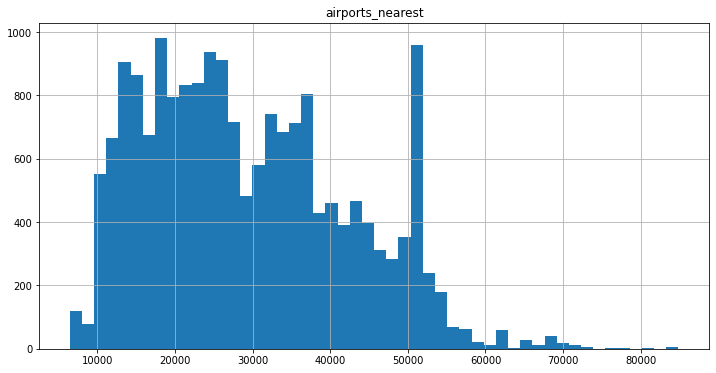

In [110]:
data.hist('airports_nearest', bins=50, figsize=(12,6))
plt.show()

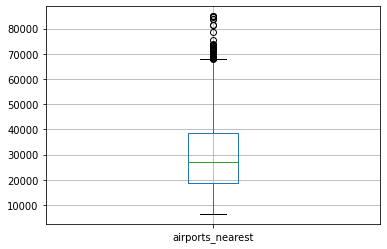

In [111]:
data.boxplot('airports_nearest')
plt.show()

В основном квартиры продаются в домах, расположенных на расстоянии от 11000 до 37000 метров от ближайшего аэропорта. Однако есть пик на 51000 метров. По-моему, эта картина адекватно описывает реальное расположение аэропорта вблизи городов. Во-первых, аэропорт должен находиться на адекватном расстоянии от крупного населенного пункта (Санкт-Петербурга). По данным Яндекса, расстояние по прямой от центра Петербурга до аэропорта Пулково - 62 км. Во-вторых, вокруг аэропорта может быть много небольших населенных пунктов, расстояние до которых вполне может быть менее 40 км.

**4.1.12 Расстояние до ближайшего парка - "parks_nearest".**

In [112]:
data['parks_nearest'].describe()

count    17569.000000
mean       475.869344
std        235.029312
min          1.000000
25%        428.500000
50%        460.000000
75%        460.000000
max       3190.000000
Name: parks_nearest, dtype: float64

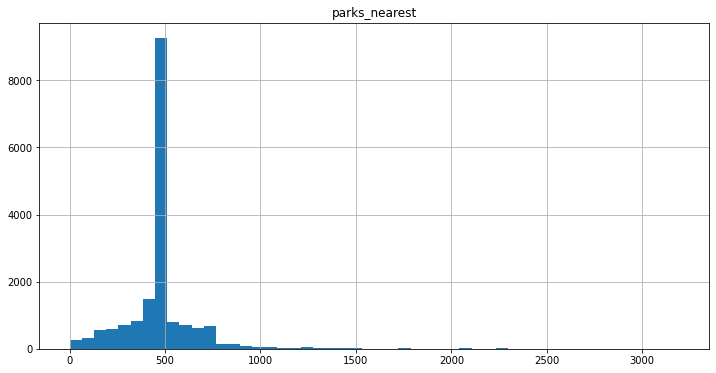

In [113]:
data.hist('parks_nearest', bins=50, figsize=(12,6))
plt.show()

Как видно по графику, ближайшие парки, в основном, расположены в пределах 800 метров от дома. Пиковое значение (460 метров) является медианным. Им мы заполнили пропуски, и поэтому здесь явно выраженный пик.

**4.1.13 День и месяц публикации объявления - "weekday_exposition" и "month_exposition".**

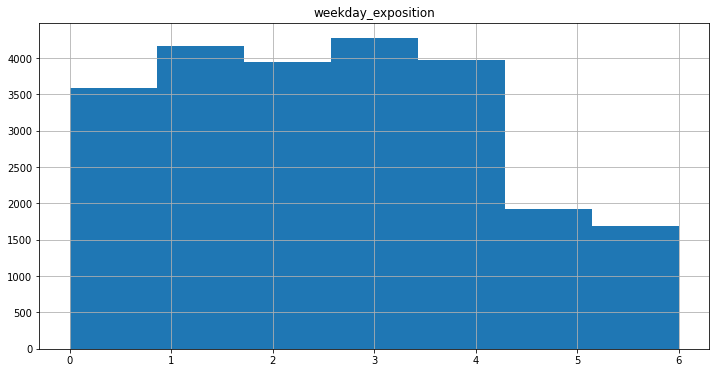

In [114]:
data.hist('weekday_exposition', bins=7, figsize=(12,6))
plt.show()

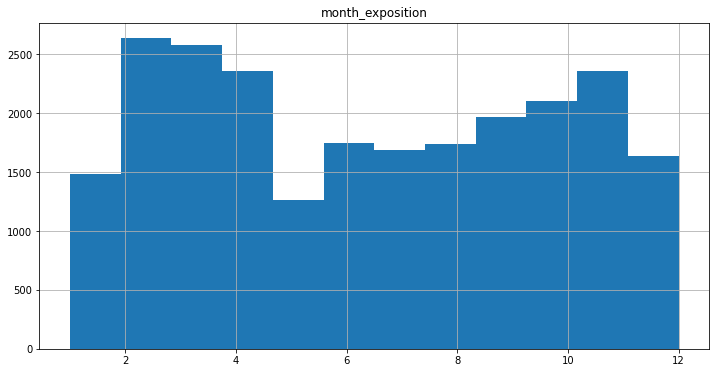

In [115]:
data.hist('month_exposition', bins=12, figsize=(12,6))
plt.show()

Что касается дня размещения объявления, в будние дни их размещали примерно одинаково (чуть чаще в четверг). В выходные объявления размещались в 2 раза реже, чем в будни.

Распределение по месяцам тоже имеет некоторые особенности. В январе, мае и декабре они размещались реже, чем в другие месяцы (думаю, что это связано с праздниками). Пик размещений приходится на февраль. Летом объявления размещаются в среднем одинаково, а в сентябре начинается рост, который достигает пика в ноябре.

**Переходим к выполнению заданий.**

**4.2 Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.**

Вначале построим гистограмму.

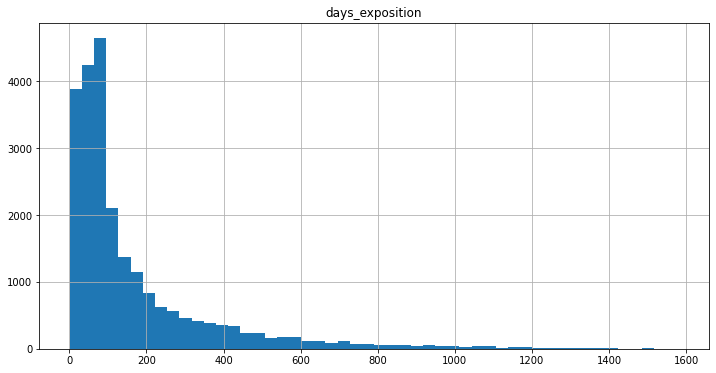

In [116]:
data.hist('days_exposition', bins=50, figsize=(12,6))
plt.show()

Рассчитаем медиану и среднее для всех объявлений и выведем значения на экран:

In [117]:
print('Медианное время продажи квартир', data['days_exposition'].median(), 'дней.')
print('Среднее время продажи квартир', data['days_exposition'].mean(), 'дней.')

Медианное время продажи квартир 95.0 дней.
Среднее время продажи квартир 169.9048488451087 дней.


Для определения быстрых и необычайно долгих продаж лучше всего ориентироваться на медианное значение - 95 дней (т.е. примерно 3 месяца).

Быстрыми продажами можно считать те, которые были совершены в 2 раза быстрее, чем медиана (т.е., быстрее 47 дней). 

Аномально долгими можно считать продажи, которые заняли свыше 500 дней (более 5 медианных значений).

**4.3 Какие факторы больше всего влияют на общую (полную) стоимость объекта?**

Посмотрим на линейную корреляцию цены от следующих параметров:

* total_area;
* living_area;
* kitchen_area;
* rooms;
* floor;
* weekday_exposition;
* month_exposition;
* year_exposition.

In [118]:
data.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_1m,weekday_exposition,month_exposition,year_exposition,cityCenters_km
total_images,1.000000,0.105049,0.116876,0.099672,0.054112,0.009629,0.102088,0.032429,0.040101,-0.028223,...,0.037033,-0.006717,0.011777,0.007999,-0.039571,0.134044,-0.009577,0.004388,0.139024,-0.053537
last_price,0.105049,1.000000,0.653735,0.363230,0.293872,-0.006604,0.586299,0.027016,0.000628,-0.025094,...,0.198336,-0.009406,0.209264,-0.054056,0.064146,0.738066,0.001337,0.002700,-0.042861,-0.212279
total_area,0.116876,0.653735,1.000000,0.758718,0.396252,-0.075263,0.946972,-0.024374,-0.007872,-0.072024,...,0.201422,-0.011784,0.201823,-0.045902,0.116711,0.303774,-0.005707,0.005004,-0.079092,-0.239414
rooms,0.099672,0.363230,0.758718,1.000000,0.246221,-0.227904,0.826703,-0.151268,-0.005043,-0.146114,...,0.158035,-0.039977,0.122332,-0.009144,0.099951,0.056212,-0.005200,-0.003873,-0.054534,-0.196693
ceiling_height,0.054112,0.293872,0.396252,0.246221,1.000000,-0.084472,0.376101,-0.045529,-0.033738,0.011557,...,0.248743,-0.039562,0.216904,-0.067479,0.087630,0.293368,-0.022926,-0.002313,-0.052846,-0.295472
floors_total,0.009629,-0.006604,-0.075263,-0.227904,-0.084472,1.000000,-0.158888,0.678287,-0.004505,0.070270,...,-0.158443,0.085532,-0.049193,-0.020484,-0.042295,0.149300,0.012467,0.016652,0.007980,0.047127
living_area,0.102088,0.586299,0.946972,0.826703,0.376101,-0.158888,1.000000,-0.088675,-0.004464,-0.054465,...,0.208017,-0.035573,0.184096,-0.035360,0.110496,0.232358,-0.004796,-0.000280,-0.070513,-0.237009
floor,0.032429,0.027016,-0.024374,-0.151268,-0.045529,0.678287,-0.088675,1.000000,-0.008026,0.035953,...,-0.105182,0.063474,-0.029968,-0.018863,-0.031742,0.129840,0.010895,0.020665,0.005272,0.030037
is_apartment,0.040101,0.000628,-0.007872,-0.005043,-0.033738,-0.004505,-0.004464,-0.008026,1.000000,0.003030,...,-0.002423,-0.011801,-0.009797,0.017142,-0.064917,0.006050,0.007718,0.111308,0.217757,-0.003568
studio,-0.028223,-0.025094,-0.072024,-0.146114,0.011557,0.070270,-0.054465,0.035953,0.003030,1.000000,...,-0.032121,0.002496,-0.009242,-0.018230,-0.019066,0.015583,-0.000862,-0.000699,0.010851,0.004548


Были получены следующие коэффициенты корреляции цены:

* total_area - 0.653735;
* living_area - 0.586299;
* kitchen_area - 0.485120;
* rooms - 0.363230;
* floor - 0.027016;
* weekday_exposition - 0.001337;
* month_exposition - 0.002700;
* year_exposition - -0.042861.

Как видно по вышеприведенным значениям, цена объекта сильнее всего зависит от общей площади объекта и чуть в меньшей степени от жилой площади и площади кухни. Однако, жилая площадь и площадь кухни входят в общую площадь, поэтому будем считать, что **общая площадь** - главный фактор, влияющий на стоимость объекта недвижимости.

Визуализируем это.

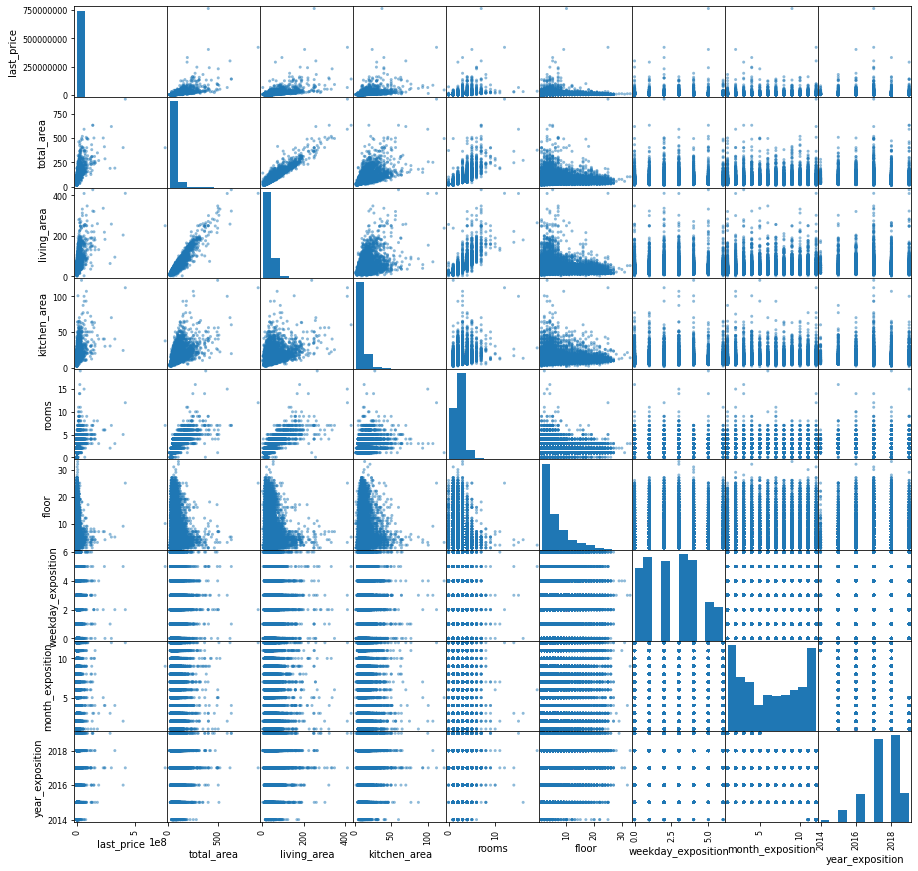

In [119]:
data_total_area = data.loc[:,['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'floor', 'weekday_exposition', 'month_exposition', 'year_exposition']]
pd.plotting.scatter_matrix(data_total_area, figsize=(15, 15));

График зависимости 'last_price' от 'total_area' подтверждает зависимость стоимости недвижимости от ее общей площади. Остальные факторы не оказывают существенного влияния на стоимость.

**4.4 Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.**

In [120]:
data_top10 = data.groupby('locality_name')['price_1m'].agg(['count', 'mean']).sort_values(by='count', ascending=False).head(10)
data_top10.columns = ['count', 'price_1m_mean']
print(data_top10.sort_values(by='price_1m_mean', ascending=False))

                   count  price_1m_mean
locality_name                          
Санкт-Петербург    15642  114849.168137
Пушкин               369  103125.373984
деревня Кудрово      299   92473.086957
поселок Парголово    327   90175.489297
поселок Мурино       552   85629.110507
поселок Шушары       439   78550.883827
Колпино              338   75424.150888
Гатчина              307   68745.693811
Всеволожск           398   68654.007538
Выборг               237   58141.489451


Среди 10 населенных пунктов с самым большим количеством объявлений самая высокая средняя стоимость квадратного метра в Санкт-Петербурге, а самая низкая - в Выборге.

**4.5 Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.**

Для начала создадим отдельную таблицу.

In [121]:
data_center_spb = data.loc[data['locality_name']=='Санкт-Петербург',['last_price', 'cityCenters_km']].reset_index(drop=True)
data_center_spb['cityCenters_km'] = data_center_spb['cityCenters_km'].astype('int')
data_center_spb.head(10)

,last_price,cityCenters_km
0,13000000.0,16
1,5196000.0,14
2,64900000.0,7
3,10000000.0,8
4,7915000.0,12
5,5400000.0,15
6,5050000.0,14
7,4650000.0,14
8,6700000.0,11
9,4180000.0,15


Построим сводную таблицу:

In [122]:
final_data_spb = data_center_spb.pivot_table(index='cityCenters_km', values='last_price', aggfunc='mean')
final_data_spb['last_price_mln'] = final_data_spb['last_price']/1000000
final_data_spb

,last_price,last_price_mln
cityCenters_km,,
0,3.144912e+07,31.449116
1,2.120672e+07,21.206721
2,1.778832e+07,17.788320
3,1.113739e+07,11.137395
4,1.330428e+07,13.304280
5,1.445600e+07,14.455996
6,1.533842e+07,15.338418
7,1.477515e+07,14.775153
8,9.950004e+06,9.950004


Для наглядности визуализируем эти данные.

<AxesSubplot:xlabel='cityCenters_km'>

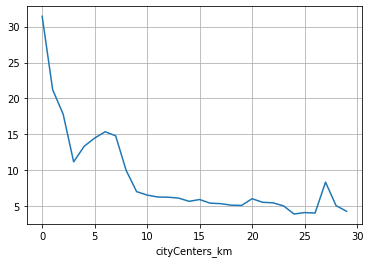

In [123]:
final_data_spb['last_price_mln'].plot(grid=True)

Как видно из графика, самые дорогие квартиры находятся на расстоянии до 3 км от центра Петербурга. Цена на расстоянии до 6-7 км от центра выше, чем на расстоянии от 3 до 5 км. Это может быть связано со многими факторами (класс жилья, год сдачи дома, инфраструктура и т.д.). Далее цена снижается вплоть до 26 км от центра. В 27 км от центра она несколько выше, чем в близлежащих областях, что может быть связано также с различными факторами.

### Общий вывод

**В процессе исследования на начальном этапе была проведена подготовка данных, в ходе которой были устранены пропущенные значения, изменены типы данных, удалены дубликаты, найдены и устранены аномалии. В результате подготовки были удалены 0,62 % сведений исходного датафрейма, что никак не могло сказаться на точности исследования. Далее были добавлены несколько столбцов, которые были нужны нам для анализа. В конечном итоге по результатам анализа можно сделать следующие выводы:**

* основную долю рынка составляют одно- и двухкомнатные квартиры площадью от 30 до 50 кв.м.;
* средняя стоимость жилья на рынке находится в промежутке от 3,5 до 4 млн. рублей;
* большую часть рынка составляют пяти- и девятиэтажные дома;
* на продажу выставлены в основном квартиры, расположенные не на крайних этажах (не на 1 и не на последнем);
* медианное время продажи жилья составляет примерно 3 месяца;
* главным фактором, влияющим на стоимость объекта недвижимости, является общая площадь;
* самое дорогое жилье располагается в Санкт-Петербурге (стоимость 1 кв.м. равна почти 115 тыс. рублей), а самое дешевое - в Выборге (стоимость 1 кв.м. чуть больше 58 тыс. рублей) (статистика по топ-10 городов по числу объявлений);
* в пределах Санкт-Петербурга стоимость жилья самая высокая в пределах 3 км от центра города.
